# Notes
The frequencies were computed using, the Codon-Frequency extraction script **Calculate_Codon_Null_dist.py** as such  `../utils/Calculate_Codon_Null_dist.py -i ./Genes/CDS -a`

In [1]:
import pandas as pd
import numpy as np
import os
import gzip
from Bio import SeqIO
from Bio.SeqUtils import CodonUsage as CU
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm import tqdm_notebook

from scipy import stats
%matplotlib inline

# 1) Loading Sequences

In [2]:
CodonsDict = {'TTT': 0, 'TTC': 0, 'TTA': 0, 'TTG': 0, 'CTT': 0,
               'CTC': 0, 'CTA': 0, 'CTG': 0, 'ATT': 0, 'ATC': 0,
               'ATA': 0, 'ATG': 0, 'GTT': 0, 'GTC': 0, 'GTA': 0,
               'GTG': 0, 'TAT': 0, 'TAC': 0, 'TAA': 0, 'TAG': 0,
               'CAT': 0, 'CAC': 0, 'CAA': 0, 'CAG': 0, 'AAT': 0,
               'AAC': 0, 'AAA': 0, 'AAG': 0, 'GAT': 0, 'GAC': 0,
               'GAA': 0, 'GAG': 0, 'TCT': 0, 'TCC': 0, 'TCA': 0,
               'TCG': 0, 'CCT': 0, 'CCC': 0, 'CCA': 0, 'CCG': 0,
               'ACT': 0, 'ACC': 0, 'ACA': 0, 'ACG': 0, 'GCT': 0,
               'GCC': 0, 'GCA': 0, 'GCG': 0, 'TGT': 0, 'TGC': 0,
               'TGA': 0, 'TGG': 0, 'CGT': 0, 'CGC': 0, 'CGA': 0,
               'CGG': 0, 'AGT': 0, 'AGC': 0, 'AGA': 0, 'AGG': 0,
               'GGT': 0, 'GGC': 0, 'GGA': 0, 'GGG': 0}

SynonymousCodons = { 
    'CYS': ['TGT', 'TGC'], 
    'ASP': ['GAT', 'GAC'], 
    'SER': ['TCT', 'TCG', 'TCA', 'TCC', 'AGC', 'AGT'], 
    'GLN': ['CAA', 'CAG'], 
    'MET': ['ATG'], 
    'ASN': ['AAC', 'AAT'], 
    'PRO': ['CCT', 'CCG', 'CCA', 'CCC'], 
    'LYS': ['AAG', 'AAA'], 
    'STOP': ['TAG', 'TGA', 'TAA'], 
    'THR': ['ACC', 'ACA', 'ACG', 'ACT'], 
    'PHE': ['TTT', 'TTC'], 
    'ALA': ['GCA', 'GCC', 'GCG', 'GCT'], 
    'GLY': ['GGT', 'GGG', 'GGA', 'GGC'], 
    'ILE': ['ATC', 'ATA', 'ATT'], 
    'LEU': ['TTA', 'TTG', 'CTC', 'CTT', 'CTG', 'CTA'], 
    'HIS': ['CAT', 'CAC'], 
    'ARG': ['CGA', 'CGC', 'CGG', 'CGT', 'AGG', 'AGA'], 
    'TRP': ['TGG'], 
    'VAL': ['GTA', 'GTC', 'GTG', 'GTT'], 
    'GLU': ['GAG', 'GAA'], 
    'TYR': ['TAT', 'TAC']}

codon_list = sorted(CodonsDict.keys())

path = './Genes/CDS'
dbs = os.listdir(path)
dbs = [i for i in dbs if 'CDS.fasta' in i and not 'highSet' in i and not 'gz' in i]
print(dbs)
f = open(os.path.join('./Genes/','LOTUS_Seqeuences_2.gb'))
handle = SeqIO.parse(f, 'gb')
LOTUS = {}
for i in handle:
    LOTUS[i.annotations['organism']] = i
f = open(os.path.join('./Genes/','SGNH_Seqeuences.gb'))
handle = SeqIO.parse(f, 'gb')
SGNH = {}
for i in handle:
    SGNH[i.annotations['organism']] = i
handle = SeqIO.parse('./Genes/Oskar/oskar_mRNAs.fasta', 'fasta')
OSKAR = {}
for i in handle:
    orga = ' '.join(i.description.split(' ')[1:3])
    OSKAR[orga] = i

['Polistes_canadensis.CDS.fasta', 'Culex_quinquefasciatus.CDS.fasta', 'Copidosoma_floridanum.CDS.fasta', 'Fopius_arisanus.CDS.fasta', 'Stomoxys_calcitrans.CDS.fasta', 'Drosophila_virilis.CDS.fasta', 'Orussus_abietinus.CDS.fasta', 'Musca_domestica.CDS.fasta', 'Bactrocera_dorsalis.CDS.fasta', 'Harpegnathos_saltator.CDS.fasta', 'Neodiprion_lecontei.CDS.fasta', 'Ceratitis_capitata.CDS.fasta', 'Acromyrmex_echinatior.CDS.fasta', 'Nasonia_vitripennis.CDS.fasta', 'Bactrocera_oleae.CDS.fasta', 'Drosophila_melanogaster.CDS.fasta', 'Athalia_rosae.CDS.fasta']


/home/lblondel/.local/lib/python3.6/site-packages/Bio/GenBank/Scanner.py:1401: BiopythonParserWarning: Attempting to parse malformed locus line:
'LOCUS       LOTUS_-_NT_033777_-_osk_mRNA_-_osk_CDS_extraction         372 bp    DNA     linear   UNA 10-JUN-2016\n'
Found locus 'LOTUS_-_NT_033777_-_osk_mRNA_-_osk_CDS_extraction' size '372' residue_type 'DNA'
Some fields may be wrong.
  BiopythonParserWarning)
/home/lblondel/.local/lib/python3.6/site-packages/Bio/GenBank/Scanner.py:184: BiopythonParserWarning: line too short to contain a feature: '     misc_feature'
  BiopythonParserWarning)
/home/lblondel/.local/lib/python3.6/site-packages/Bio/GenBank/Scanner.py:1401: BiopythonParserWarning: Attempting to parse malformed locus line:
'LOCUS       LOTUS_-_NW_001817681_-_oskar_mRNA_-_oskar_CDS_extraction         396 bp    DNA     linear   UNA 10-JUN-2016\n'
Found locus 'LOTUS_-_NW_001817681_-_oskar_mRNA_-_oskar_CDS_extraction' size '396' residue_type 'DNA'
Some fields may be wrong.
  Biopython

# 2) Define Functions

In [3]:
def _count_codons_freq(seq):
    # make the codon dictionary local
    codon_count = CodonsDict.copy()
    # Make sure the sequence starts with a start codon and is a multiple of 3
    tot = 0.0
    if len(seq.seq) % 3 == 0:
        # make sure the sequence is lower case
        if str(seq.seq).islower():
            dna_sequence = str(seq.seq).upper()
        else:
            dna_sequence = str(seq.seq)
        for i in range(0, len(dna_sequence), 3):
            codon = dna_sequence[i:i + 3]
            if codon in codon_count:
                tot += 1.0
                codon_count[codon] += 1
            else:
                print("illegal codon %s in gene: %s" % (codon, seq.id))
        if tot:
            for c in codon_count:
                codon_count[c] = codon_count[c] / tot
            return codon_count
        else:
            return None
    else:
        print("invalid CDS")
        
def make_codon_list(cod):
    tmp = []
    for c in sorted(CodonsDict.keys()):
        tmp.append(cod[c])
    return tmp

def GC3(seq):
    gc3 = 0.0
    at3 = 0.0
    if len(seq.seq) % 3 == 0:
        skip = False
        alphabet = [i for i in "BDEFHIJKLMNOPQRSUVWXYZ"]
        for let in alphabet:
            if let in str(seq.seq):
                skip = True
        if not skip:
            for i in range(0, len(seq), 3):
                if seq[i:i+3][2] in ['G','C']:
                    gc3 += 1
                else:
                    at3 += 1
            return at3/(at3+gc3), gc3/(at3+gc3)
    return None, None

def check_CDS(seq):
    if len(seq.seq) % 3 == 0:
        skip = False
        alphabet = [i for i in "BDEFHIJKLMNOPQRSUVWXYZ"]
        for let in alphabet:
            if let in str(seq.seq):
                return False
        return True
    else:
        return False

def wobble(seq):
    g3 = 0.0
    a3 = 0.0
    c3 = 0.0
    t3 = 0.0
    if len(seq.seq) % 3 == 0:
        skip = False
        alphabet = [i for i in "BDEFHIJKLMNOPQRSUVWXYZ"]
        for let in alphabet:
            if let in str(seq.seq):
                skip = True
        if not skip:
            for i in range(0, len(seq), 3):
                if seq[i:i+3][2] == 'G':
                    g3 += 1
                elif seq[i:i+3][2] == 'C':
                    c3 += 1
                elif seq[i:i+3][2] == 'A':
                    a3 += 1
                elif seq[i:i+3][2] == 'T':
                    t3 += 1
            tot = a3 + g3 + c3 + t3
            return a3/tot, t3/tot, g3/tot, c3/tot
    return None, None, None, None

def Z_score(x, dist):
    #Z = x-mu/sigma
    mu = np.mean(dist)
    sigma = np.std(dist)
    z = (x-mu)/sigma
    return z

def z_to_p(z,output="F"):
    p=0.5*(1+sp.special.erf(z/np.sqrt(2)))
    if output=="T":
        print("###########################################")
        print("#       Convert Z score to p-value        #")
        print("###########################################")
        print("                          Z= "+str(z))
        print(" Left-tailed p-value P(z<Z)= "+str(p))
        print("Right-tailed p-value P(z>Z)= "+str(1-p))
        print("Two tailed p-value P(|z|>Z)= "+str(2*(1-p)))
        print("")
    else:
        return 2*(1-p)

# 3) Calculate codon frequencies accross the datasets

## Calculate Osk GC3/AT3

In [4]:
osk = []
for k in LOTUS:
    la, lg = GC3(LOTUS[k])
    sa, sg = GC3(SGNH[k])
    osk.append([k, 'LOTUS', 'AT3', la])
    osk.append([k, 'LOTUS', 'GC3', lg])
    osk.append([k, 'SGNH', 'AT3', sa])
    osk.append([k, 'SGNH', 'GC3', sg])

osk = pd.DataFrame(osk, columns=['Organism', 'Domain','Codon','Frequency'] )

## Calculate A3, G3, C3, T3 usage

In [5]:
osk3 = []
for k in LOTUS:
    la, lt, lc, lg = wobble(LOTUS[k])
    sa, st, sc, sg = wobble(SGNH[k])
    osk3.append([k, 'LOTUS', 'A3', la])
    osk3.append([k, 'LOTUS', 'T3', lt])
    osk3.append([k, 'LOTUS', 'C3', lc])
    osk3.append([k, 'LOTUS', 'G3', lg])
    osk3.append([k, 'SGNH', 'A3', sa])
    osk3.append([k, 'SGNH', 'T3', st])
    osk3.append([k, 'SGNH', 'C3', sc])
    osk3.append([k, 'SGNH', 'G3', sg])

osk3 = pd.DataFrame(osk3, columns=['Organism', 'Domain','Codon','Frequency'] )

## Calculate Codon Usage Datasets 

In [6]:
#gunzip the files
for db in dbs:
    if '.gz' in db:
        with gzip.open(os.path.join(path,db), 'rb') as f:
            file_content = f.read()
            with open(os.path.join(path,db.replace('.gz','')), 'wb') as out:
                out.write(file_content)

In [7]:
newdb = []
for db in dbs:
    seqpath = os.path.join(path,db.replace('.gz',''))
    newdb.append(seqpath.replace('.CDS', '.filtered'))

In [8]:
# Clean the CDS files to remove any gene that does not meet 2 criterias
# 1) Sequence must be modulo 3
# 2) Sequence must have only ATCG 
newdb = []
for db in dbs:
    seqpath = os.path.join(path,db.replace('.gz',''))
    handle = SeqIO.parse(seqpath, 'fasta')
    good = []
    for seq in handle:
        if check_CDS(seq):
            good.append(seq)
    SeqIO.write(good, seqpath.replace('.CDS', '.filtered'), 'fasta')
    newdb.append(seqpath.replace('.CDS', '.filtered'))

In [9]:
# Calculate the genome indexes for each sequences
indexes = {}
for db in newdb:
    orga = db.split('.')[1].split('/')[-1].replace('_',' ')
    myIndex = CU.CodonAdaptationIndex()
    myIndex.generate_index(db)
    indexes[orga] = myIndex

In [10]:
# Generate the CAI distribution for all the genes in the genome
results = []
for db in newdb:
    orga = db.split('.')[1].split('/')[-1].replace('_',' ')
    handle = SeqIO.parse(db, 'fasta')
    for seq in handle:
        i = indexes[orga].cai_for_gene(str(seq.seq))
        results.append([orga, 'CAI', i])
CAIs = pd.DataFrame(results, columns=['Organism', 'Metric', 'Value'])

In [11]:
CAIs.to_csv(os.path.join(path, "CAIs.csv"))

In [12]:
CAIs = pd.read_csv(os.path.join(path, "CAIs.csv"))

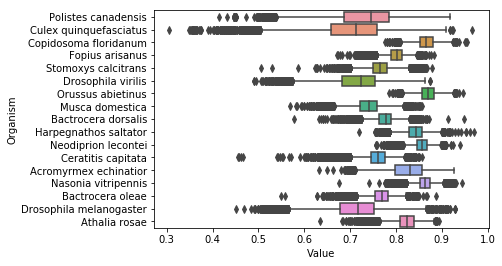

In [13]:
sns.boxplot(data=CAIs, x="Value", y="Organism")

In [14]:
results = []
for orga in LOTUS:
    Li = indexes[orga].cai_for_gene(str(LOTUS[orga].seq))
    Oi = indexes[orga].cai_for_gene(str(SGNH[orga].seq))
    Os = indexes[orga].cai_for_gene(str(OSKAR[orga].seq))
    results.append([orga, 'LOTUS', Li])
    results.append([orga, 'OSK', Oi])
    results.append([orga, 'OSKAR', Os])
oskars = pd.DataFrame(results, columns=['Organism', 'Domain', 'Value'])

In [15]:
order = sorted(LOTUS.keys())

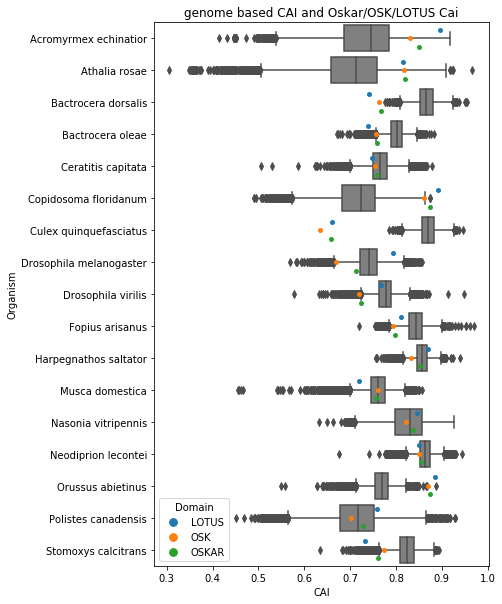

In [16]:
fig = plt.figure(figsize=(6,10))
sns.boxplot(data=CAIs, x="Value", y="Organism", color='Gray')
sns.swarmplot(data=oskars, x="Value", y="Organism", hue='Domain', dodge=True, order=order)
plt.xlabel('CAI')
plt.title("genome based CAI and Oskar/OSK/LOTUS Cai")
fig.savefig('genome_CAI.svg')
fig.savefig('genome_CAI.png')
fig.savefig('genome_CAI.pdf')

In [17]:
# Generate the CAI distribution for all the genes in the genome
results = []
for db in newdb:
    orga = db.split('.')[1].split('/')[-1].replace('_',' ')
    handle = SeqIO.parse(db, 'fasta')
    for seq in handle:
        i = indexes['Drosophila melanogaster'].cai_for_gene(str(seq.seq))
        results.append([orga, 'CAI', i])
dmelCAIs = pd.DataFrame(results, columns=['Organism', 'Metric', 'Value'])

In [18]:
results = []
for orga in LOTUS:
    Li = indexes['Drosophila melanogaster'].cai_for_gene(str(LOTUS[orga].seq))
    Oi = indexes['Drosophila melanogaster'].cai_for_gene(str(SGNH[orga].seq))
    Os = indexes['Drosophila melanogaster'].cai_for_gene(str(OSKAR[orga].seq))
    results.append([orga, 'LOTUS', Li])
    results.append([orga, 'OSK', Oi])
    results.append([orga, 'OSKAR', Os])
dmeloskars = pd.DataFrame(results, columns=['Organism', 'Domain', 'Value'])

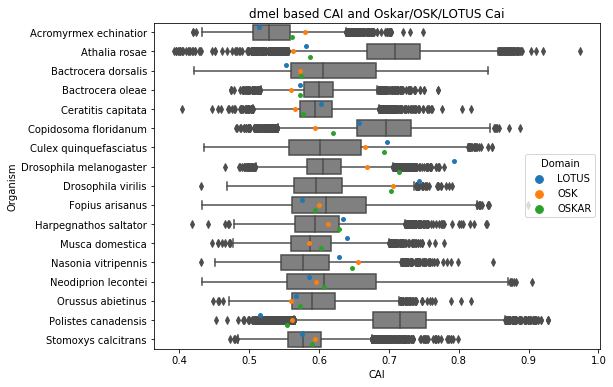

In [19]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(data=dmelCAIs, x="Value", y="Organism", color='Gray')
sns.swarmplot(data=dmeloskars, x="Value", y="Organism", hue='Domain', dodge=True, order=order)
plt.xlabel('CAI')
plt.title("dmel based CAI and Oskar/OSK/LOTUS Cai")
fig.savefig('genome_CAI.svg')

# AA composition differences

In [20]:
from Bio import Alphabet
from scipy import spatial
import random
import tqdm

In [21]:
def calculate_AAfreq(seq):
    prot = seq.seq.translate()
    frequencies = []
    for aa in Alphabet.IUPAC.IUPACProtein.letters:
        frequencies.append(prot.count(aa)/len(prot))
    return frequencies

In [22]:
results = []
for db in tqdm_notebook(newdb):
    orga = db.split('.')[1].split('/')[-1].replace('_',' ')
    handle = SeqIO.parse(db, 'fasta')
    for seq in handle:
        freq = calculate_AAfreq(seq)
        results.append([orga] + freq)
AAfreq = pd.DataFrame(results, columns=['Organism'] + [i for i in Alphabet.IUPAC.IUPACProtein.letters])

In [23]:
results = []
for orga in LOTUS:
    lotus = LOTUS[orga]
    osk = SGNH[orga]
    oskar = OSKAR[orga]
    freq_lotus = calculate_AAfreq(lotus)
    freq_osk = calculate_AAfreq(osk)
    freq_oskar = calculate_AAfreq(oskar)
    results.append([orga, 'LOTUS'] + freq_lotus)
    results.append([orga, 'OSK'] + freq_osk)
    results.append([orga, 'OSKAR'] + freq_oskar)
AAfreq_oskar = pd.DataFrame(results, columns=['Organism', 'Domain'] + [i for i in Alphabet.IUPAC.IUPACProtein.letters])

In [24]:
genome_AAfreq = AAfreq.groupby('Organism', as_index=False).mean()

In [25]:
distances = []
osk_distance = []
metric='cosine'
for line in tqdm_notebook(AAfreq.values):
    orga = line[0]
    basefreq = genome_AAfreq[genome_AAfreq['Organism'] == orga][[i for i in Alphabet.IUPAC.IUPACProtein.letters]].values[0]
    genefreq = line[1:]
    dist = spatial.distance.pdist([basefreq, genefreq], metric)[0]
    distances.append([orga, dist])
for line in tqdm_notebook(AAfreq_oskar.values):
    orga = line[0]
    domain = line[1]
    basefreq = genome_AAfreq[genome_AAfreq['Organism'] == orga][[i for i in Alphabet.IUPAC.IUPACProtein.letters]].values[0]
    genefreq = line[2:]
    dist = spatial.distance.pdist([basefreq, genefreq], metric)[0]
    osk_distance.append([orga, domain, dist])
genes_AAfreq_dist = pd.DataFrame(distances, columns=['Organism', 'Cosine Distance'])
oskar_AAfreq_dist = pd.DataFrame(osk_distance, columns=['Organism', 'Domain', 'Cosine Distance'])

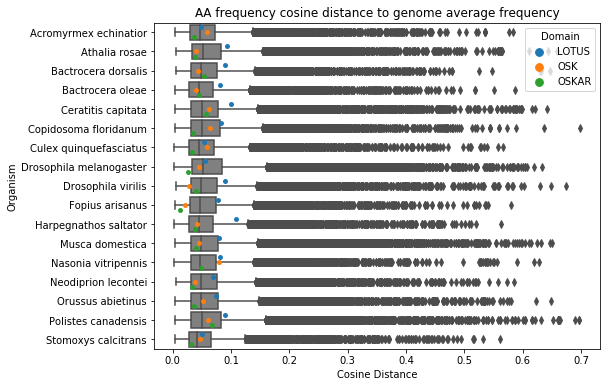

In [26]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(data=genes_AAfreq_dist, x="Cosine Distance", y="Organism", color='Gray')
sns.swarmplot(data=oskar_AAfreq_dist, x="Cosine Distance", y="Organism", hue='Domain', dodge=True, order=order)
plt.xlabel('Cosine Distance')
plt.title("AA frequency cosine distance to genome average frequency")
fig.savefig('AA_freq_genes_distance_to_genome.png')
fig.savefig('AA_freq_genes_distance_to_genome.svg')
fig.savefig('AA_freq_genes_distance_to_genome.pdf')

## Compare LOTUS and OSK AA freq

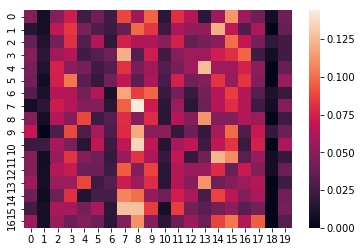

In [27]:
    sns.heatmap(AAfreq_oskar[(AAfreq_oskar['Domain'].isin(['LOTUS']))][[i for i in Alphabet.IUPAC.IUPACProtein.letters]].values)

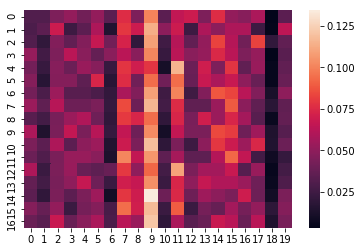

In [28]:
    sns.heatmap(AAfreq_oskar[(AAfreq_oskar['Domain'].isin(['OSK']))][[i for i in Alphabet.IUPAC.IUPACProtein.letters]].values)

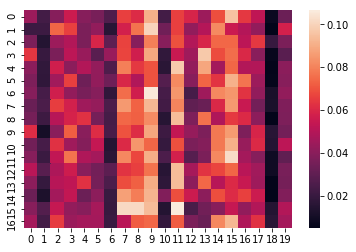

In [29]:
    sns.heatmap(AAfreq_oskar[(AAfreq_oskar['Domain'].isin(['OSKAR']))][[i for i in Alphabet.IUPAC.IUPACProtein.letters]].values)

In [30]:
data = pd.melt(AAfreq_oskar, id_vars=AAfreq_oskar.columns[:2], value_vars=[i for i in Alphabet.IUPAC.IUPACProtein.letters])

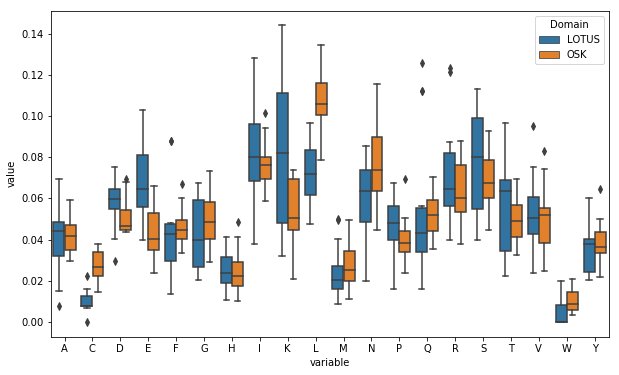

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[data['Domain'].isin(['OSK','LOTUS'])], y='value', x='variable', hue='Domain')

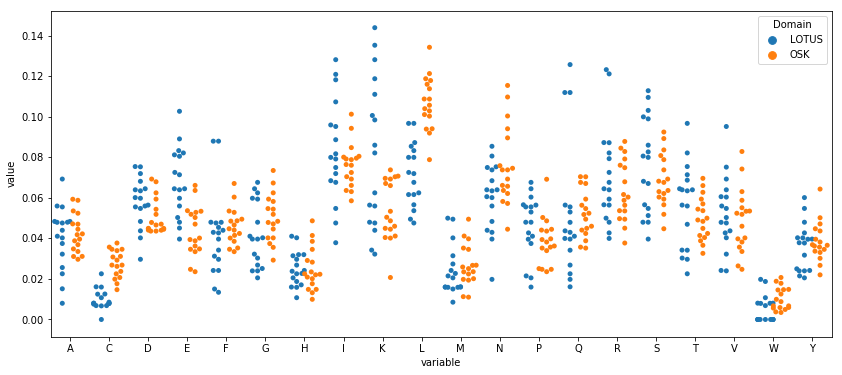

In [32]:
plt.figure(figsize=(14,6))
sns.swarmplot(data=data[data['Domain'].isin(['OSK','LOTUS'])], y='value', x='variable', hue='Domain', dodge=True)

In [33]:
data_genome = pd.melt(AAfreq, id_vars=AAfreq.columns[:1], value_vars=[i for i in Alphabet.IUPAC.IUPACProtein.letters])

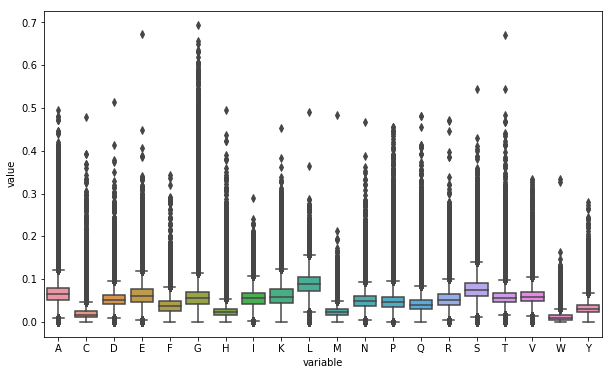

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_genome, y='value', x='variable')

In [35]:
def _count_codons_freq(seq):
    # make the codon dictionary local
    codon_count = CodonsDict.copy()
    # Make sure the sequence starts with a start codon and is a multiple of 3
    tot = 0.0
    if len(seq.seq) % 3 == 0:
        # make sure the sequence is lower case
        if str(seq.seq).islower():
            dna_sequence = str(seq.seq).upper()
        else:
            dna_sequence = str(seq.seq)
        for i in range(0, len(dna_sequence), 3):
            codon = dna_sequence[i:i + 3]
            if codon in codon_count:
                tot += 1.0
                codon_count[codon] += 1
            else:
                print("illegal codon %s in gene: %s" % (codon, seq.id))
        if tot:
            for c in codon_count:
                codon_count[c] = codon_count[c] / tot
            return codon_count
        else:
            return None
    else:
        print("invalid CDS")
        
def make_codon_list(cod):
    tmp = []
    for c in sorted(CodonsDict.keys()):
        tmp.append(cod[c])
    return tmp


def Z_score(x, dist):
    #Z = x-mu/sigma
    mu = np.mean(dist)
    sigma = np.std(dist)
    z = (x-mu)/sigma
    return z

In [36]:
osk_codon = []
for k in LOTUS:
    l = _count_codons_freq(LOTUS[k])
    s = _count_codons_freq(SGNH[k])
    tmp_l = [k, 'LOTUS']
    tmp_s = [k, 'OSK']
    [tmp_l.append(l[c]) for c in codon_list]
    [tmp_s.append(s[c]) for c in codon_list]
    osk_codon.append(tmp_l)
    osk_codon.append(tmp_s)
codonFreq_oskar = pd.DataFrame(osk_codon, columns=['Organism', 'Domain'] + codon_list)

In [37]:
AAdist_oskar = []
codondist_oskar = []
for orga in LOTUS:
    AA_lotus = AAfreq_oskar[(AAfreq_oskar['Domain'] == 'LOTUS') & (AAfreq_oskar['Organism'] == orga)][AAfreq_oskar.columns[2:]].values[0]
    AA_osk = AAfreq_oskar[(AAfreq_oskar['Domain'] == 'OSK') & (AAfreq_oskar['Organism'] == orga)][AAfreq_oskar.columns[2:]].values[0]
    codon_lotus = codonFreq_oskar[(codonFreq_oskar['Domain'] == 'LOTUS') & (codonFreq_oskar['Organism'] == orga)][codonFreq_oskar.columns[2:]].values[0]
    codon_osk = codonFreq_oskar[(codonFreq_oskar['Domain'] == 'OSK') & (codonFreq_oskar['Organism'] == orga)][codonFreq_oskar.columns[2:]].values[0]
    AAdist_oskar.append(spatial.distance.pdist([AA_lotus, AA_osk], metric)[0])
    codondist_oskar.append(spatial.distance.pdist([codon_lotus, codon_osk], metric)[0])    
    

/home/lblondel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


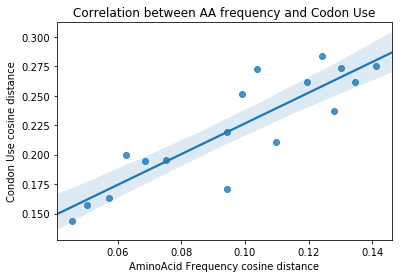

In [38]:
fig = plt.figure()
sns.regplot(AAdist_oskar, codondist_oskar)
plt.xlabel('AminoAcid Frequency cosine distance')
plt.ylabel('Condon Use cosine distance')
plt.title('Correlation between AA frequency and Codon Use')
fig.savefig('AAtoCodonFreq_Corr.png')
fig.savefig('AAtoCodonFreq_Corr.pdf')
fig.savefig('AAtoCodonFreq_Corr.svg')

In [39]:
results = []
metric='cosine'
for orga in tqdm_notebook(null):
    for seqs in null[orga]:
        five, three = seqs
        freq_five = calculate_AAfreq(five)
        freq_three = calculate_AAfreq(three)
        dist = spatial.distance.pdist([freq_five, freq_three], metric)[0]
        results.append([orga, dist])
AAfreq_intra_dist = pd.DataFrame(results, columns=['Organism', 'Cosine Distance'])

NameError: name 'null' is not defined

In [ ]:
lotus_freq = AAfreq_oskar[(AAfreq_oskar['Organism'] == orga) & (AAfreq_oskar['Domain'] == 'LOTUS')][AAfreq_oskar.columns[2:]].values

In [ ]:
distances = []
osk_distance = []
metric='cosine'
for orga in AAfreq_oskar['Organism'].unique():
    lotus_freq = AAfreq_oskar[(AAfreq_oskar['Organism'] == orga) & (AAfreq_oskar['Domain'] == 'LOTUS')][AAfreq_oskar.columns[2:]].values
    osk_freq = AAfreq_oskar[(AAfreq_oskar['Organism'] == orga) & (AAfreq_oskar['Domain'] == 'OSK')][AAfreq_oskar.columns[2:]].values
    dist = spatial.distance.pdist([lotus_freq[0], osk_freq[0]], metric)[0]
    osk_distance.append([orga, dist])
oskar_AAfreq_dist = pd.DataFrame(osk_distance, columns=['Organism', 'Cosine Distance'])

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(data=AAfreq_intra_dist, x="Cosine Distance", y="Organism", color='Gray', order=order)
sns.swarmplot(data=oskar_AAfreq_dist, x="Cosine Distance", y="Organism", color='Red', dodge=True, order=order)
plt.xlabel('Cosine Distance')
plt.title("AA frequency cosine distance between 5' and 3' VS LOTUS and OSK")
fig.savefig('AA_freq_intra_geneVSOskar.png')
fig.savefig('AA_freq_intra_geneVSOskar.svg')
fig.savefig('AA_freq_intra_geneVSOskar.pdf')

## Return to the normal codon use analysis

In [40]:
if not os.path.isfile('data.csv'):
    data = []
    data3 = []
    for db in dbs:
        orga = db.split('.')[0].replace('_',' ')
        print(os.path.join(path,db))
        handle = SeqIO.parse(os.path.join(path,db),'fasta')
        for seq in tqdm_notebook(handle):
            at, gc = GC3(seq)
            a,t,c,g = wobble(seq)
            if at:
                data.append([orga,at,gc])
            if a:
                data3.append([orga,'A3',a])
                data3.append([orga,'T3',t])
                data3.append([orga,'C3',c])
                data3.append([orga,'G3',g])
    data= pd.DataFrame(data, columns=['Organism','AT3','GC3'])
    data.to_csv('data.csv', index=False)
    data3= pd.DataFrame(data3, columns=['Organism','Codon','Frequency'])
    data3.to_csv('data3.csv', index=False)
else:
    data = pd.read_csv('data.csv')
    data3 = pd.read_csv('data3.csv')

if not os.path.isfile('data2.csv'):
    data2= []
    for i in range(len(data)):
        o = data['Organism'][i]
        a = data['AT3'][i]
        g = data['GC3'][i]
        data2.append([o,'AT3',a])
        data2.append([o,'GC3',g])
    data2 = pd.DataFrame(data2, columns=['Organism','Codon','Frequency'])
    data2.to_csv('data2.csv', index=False)
else:
    data2 = pd.read_csv('data2.csv')

# 4) Creating the Intra-Gene null distribution dataset

In [57]:
!rm null_codon3.csv

In [58]:
path = './Genes/CDS'
genomes = {}
null = {}
for genome in tqdm_notebook(newdb):
    orga = genome.split('/')[-1].split('.')[0].replace('_',' ')
    handle = SeqIO.parse(genome, 'fasta')
    genomes[orga] = []
    null[orga] = []
    for seq in handle:
        genomes[orga].append(seq)
        l = len(seq)
        if l > 702:
            s = 1
            while s%3 != 0:
                s = np.random.randint(351, l-351)
            null[orga].append([seq[:s], seq[s:]])

In [59]:
if not os.path.isfile('null_cai.csv'):
    null_cai = []
    for orga in null:
        print(orga)
        for gene in tqdm_notebook(null[orga]):
            name = gene[0].name
            cai0 = indexes[orga].cai_for_gene(str(gene[0].seq))
            cai1 = indexes[orga].cai_for_gene(str(gene[1].seq))
            dmelcai0 = indexes['Drosophila melanogaster'].cai_for_gene(str(gene[0].seq))
            dmelcai1 = indexes['Drosophila melanogaster'].cai_for_gene(str(gene[1].seq))
            null_cai.append([orga, name, 'D0', 'CAI', cai0])
            null_cai.append([orga, name, 'D1', 'CAI', cai1])                
            null_cai.append([orga, name, 'D0', 'dmelCAI', dmelcai0])                
            null_cai.append([orga, name, 'D1', 'dmelCAI', dmelcai1])       
    null_cai = pd.DataFrame(null_cai, columns=['Organism','Gene','Domain','Metric','Frequency'])
    null_cai.to_csv('null_cai.csv', index=False)
else:
    null_cai = pd.read_csv('null_cai.csv')    

Polistes canadensis



Culex quinquefasciatus



Copidosoma floridanum



Fopius arisanus



Stomoxys calcitrans



Drosophila virilis



Orussus abietinus



Musca domestica



Bactrocera dorsalis



Harpegnathos saltator



Neodiprion lecontei



Ceratitis capitata



Acromyrmex echinatior



Nasonia vitripennis



Bactrocera oleae



Drosophila melanogaster



Athalia rosae


In [60]:
if not os.path.isfile('null_at3gc3.csv'):
    null_at3gc3 = []
    null_codon3 = []
    for orga in null:
        print(orga)
        for gene in tqdm_notebook(null[orga]):
            name = gene[0].name
            a0,t0,c0,g0 = wobble(gene[0])
            a1,t1,c1,g1 = wobble(gene[1])
            at0, gc0 = GC3(gene[0])
            at1, gc1 = GC3(gene[1])
            null_at3gc3.append([orga, name, 'D0', 'A3', a0])
            null_at3gc3.append([orga, name, 'D0', 'T3', t0])
            null_at3gc3.append([orga, name, 'D0', 'C3', c0])
            null_at3gc3.append([orga, name, 'D0', 'G3', g0])
            null_at3gc3.append([orga, name, 'D1', 'A3', a1])
            null_at3gc3.append([orga, name, 'D1', 'T3', t1])
            null_at3gc3.append([orga, name, 'D1', 'C3', c1])
            null_at3gc3.append([orga, name, 'D1', 'G3', g1])
            null_codon3.append([orga, name, 'D0', 'AT3', at0])
            null_codon3.append([orga, name, 'D0', 'GC3', at0])
            null_codon3.append([orga, name, 'D1', 'AT3', at1])
            null_codon3.append([orga, name, 'D1', 'GC3', gc1])
    null_at3gc3 = pd.DataFrame(null_at3gc3, columns=['Organism','Gene','Domain','Metric','Frequency'])
    null_codon3 = pd.DataFrame(null_codon3, columns=['Organism','Gene','Domain','Metric','Frequency'])
    null_at3gc3.to_csv('null_at3gc3.csv', index=False)
    null_codon3.to_csv('null_codon3.csv', index=False)
else:
    null_at3gc3 = pd.read_csv('null_at3gc3.csv')
    null_codon3 = pd.read_csv('null_codon3.csv')

Polistes canadensis



Culex quinquefasciatus



Copidosoma floridanum



Fopius arisanus



Stomoxys calcitrans



Drosophila virilis



Orussus abietinus



Musca domestica



Bactrocera dorsalis



Harpegnathos saltator



Neodiprion lecontei



Ceratitis capitata



Acromyrmex echinatior



Nasonia vitripennis



Bactrocera oleae



Drosophila melanogaster



Athalia rosae


In [61]:
null_at3gc3_Z_score = np.zeros(len(null_at3gc3))
null_codon_Z_score = np.zeros(len(null_codon3))
null_cai_Z_score = np.zeros(len(null_cai))
for orga in tqdm_notebook(LOTUS):
    for codon in ['A3', 'T3', 'C3','G3']:
        fre = null_at3gc3[(null_at3gc3['Organism'] == orga) & (null_at3gc3['Metric'] == codon)]['Frequency']
        index = fre.index
        fre = fre.values
        dist = data3[(data3['Organism'] == orga) & (data3['Codon'] == codon)]['Frequency'].values
        z = Z_score(fre, dist)
        for i in range(len(index)):
            null_at3gc3_Z_score[index[i]] = z[i] 
    for codon in ['AT3','GC3']:
        fre = null_codon3[(null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Frequency']
        index = fre.index
        fre = fre.values
        z = Z_score(fre, data2[(data2['Organism'] == orga) & (data2['Codon'] == codon)]['Frequency'].values)
        for i in range(len(index)):
            null_codon_Z_score[index[i]] = z[i] 
    for codon in ['CAI', 'dmelCAI']:
        fre = null_cai[(null_cai['Organism'] == orga) & (null_cai['Metric'] == codon)]['Frequency']
        index = fre.index
        fre = fre.values
        if codon == 'CAI':
            z = Z_score(fre, CAIs[(CAIs['Organism'] == orga) & (CAIs['Metric'] == codon)]['Value'].values)
        else:
            z = Z_score(fre, dmelCAIs[(dmelCAIs['Organism'] == orga) & (dmelCAIs['Metric'] == 'CAI')]['Value'].values)
        for i in range(len(index)):
            null_cai_Z_score[index[i]] = z[i]

In [62]:
osk_zscore = []
codon = 'CAI'
for orga in tqdm_notebook(LOTUS):
    lotus = oskars[(oskars['Organism'] == orga) & (oskars['Domain'] == 'LOTUS')]['Value'].values
    osk = oskars[(oskars['Organism'] == orga) & (oskars['Domain'] == 'OSK')]['Value'].values
    z_lotus = Z_score(lotus, CAIs[(CAIs['Organism'] == orga) & (CAIs['Metric'] == codon)]['Value'].values)
    z_osk = Z_score(osk, CAIs[(CAIs['Organism'] == orga) & (CAIs['Metric'] == codon)]['Value'].values)
    osk_zscore.append([orga, 'LOTUS', z_lotus[0]])
    osk_zscore.append([orga, 'OSK', z_osk[0]])    
osk_zscore = pd.DataFrame(osk_zscore, columns=['Organism', 'Domain', 'Z_score'])

In [63]:
null_at3gc3['Z_score'] = pd.Series(null_at3gc3_Z_score, index=null_at3gc3.index)
null_codon3['Z_score'] = pd.Series(null_codon_Z_score, index=null_codon3.index)
null_cai['Z_score'] = pd.Series(null_cai_Z_score, index=null_cai.index)

# Plotting from the IntraGene

In [64]:
null_cai

Organism   Gene Domain   Metric  Frequency   Z_score
0        Polistes canadensis      0     D0      CAI   0.736449  0.087312
1        Polistes canadensis      0     D1      CAI   0.785150  0.797271
2        Polistes canadensis      0     D0  dmelCAI   0.528861 -0.135264
3        Polistes canadensis      0     D1  dmelCAI   0.532370 -0.045526
4        Polistes canadensis      9     D0      CAI   0.823846  1.361372
5        Polistes canadensis      9     D1      CAI   0.780221  0.725416
6        Polistes canadensis      9     D0  dmelCAI   0.512951 -0.542159
7        Polistes canadensis      9     D1  dmelCAI   0.502836 -0.800859
8        Polistes canadensis     11     D0      CAI   0.815424  1.238604
9        Polistes canadensis     11     D1      CAI   0.807809  1.127588
10       Polistes canadensis     11     D0  dmelCAI   0.505414 -0.734917
11       Polistes canadensis     11     D1  dmelCAI   0.530146 -0.102410
12       Polistes canadensis     12     D0      CAI   0.721266 -0.134016
13       Polistes canadensis     12     D1      CAI   0.763765  0.485519
14       Polistes canadensis     12     D0  dmelCAI   0.543261  0.232999
15       Polistes canadensis     12     D1  dmelCAI   0.576012  1.070599
16       Polistes canadensis     31     D0      CAI   0.665096 -0.952842
17       Polistes canadensis     31     D1      CAI   0.692577 -0.552230
18       Polistes canadensis     31     D0  dmelCAI   0.584125  1.278086
19       Polistes canadensis     31     D1  dmelCAI   0.538206  0.103717
20       Polistes canadensis     35     D0      CAI   0.725299 -0.075219
21       Polistes canadensis     35     D1      CAI   0.756502  0.379645
22       Polistes canadensis     35     D0  dmelCAI   0.534575  0.010863
23       Polistes canadensis     35     D1  dmelCAI   0.521123 -0.333160
24       Polistes canadensis     39     D0      CAI   0.745911  0.225261
25       Polistes canadensis     39     D1      CAI   0.812235  1.192104
26       Polistes canadensis     39     D0  dmelCAI   0.501713 -0.829563
27       Polistes canadensis     39     D1  dmelCAI   0.488268 -1.173419
28       Polistes canadensis     44     D0      CAI   0.644511 -1.252935
29       Polistes canadensis     44     D1      CAI   0.578527 -2.214837
...                      ...    ...    ...      ...        ...       ...
1039978        Athalia rosae  16992     D0  dmelCAI   0.515511 -1.769975
1039979        Athalia rosae  16992     D1  dmelCAI   0.521112 -1.621265
1039980        Athalia rosae  16993     D0      CAI   0.865645  1.790886
1039981        Athalia rosae  16993     D1      CAI   0.836420  0.599168
1039982        Athalia rosae  16993     D0  dmelCAI   0.566846 -0.407039
1039983        Athalia rosae  16993     D1  dmelCAI   0.571447 -0.284905
1039984        Athalia rosae  16994     D0      CAI   0.846205  0.998175
1039985        Athalia rosae  16994     D1      CAI   0.812234 -0.387108
1039986        Athalia rosae  16994     D0  dmelCAI   0.582383  0.005458
1039987        Athalia rosae  16994     D1  dmelCAI   0.579169 -0.079881
1039988        Athalia rosae  16995     D0      CAI   0.805416 -0.665138
1039989        Athalia rosae  16995     D1      CAI   0.830283  0.348912
1039990        Athalia rosae  16995     D0  dmelCAI   0.565870 -0.432965
1039991        Athalia rosae  16995     D1  dmelCAI   0.590788  0.228594
1039992        Athalia rosae  16996     D0      CAI   0.820869 -0.034979
1039993        Athalia rosae  16996     D1      CAI   0.811460 -0.418641
1039994        Athalia rosae  16996     D0  dmelCAI   0.597284  0.401072
1039995        Athalia rosae  16996     D1  dmelCAI   0.562303 -0.527659
1039996        Athalia rosae  16997     D0      CAI   0.812353 -0.382256
1039997        Athalia rosae  16997     D1      CAI   0.855655  1.383518
1039998        Athalia rosae  16997     D0  dmelCAI   0.559665 -0.597709
1039999        Athalia rosae  16997     D1  dmelCAI   0.566104 -0.426752
1040000        Athalia rosae  16998     D0      CAI   0.841294  0.797904
10400

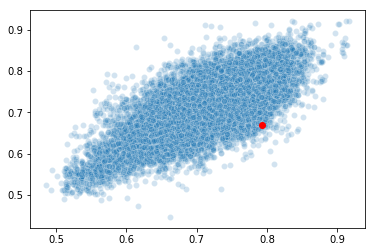

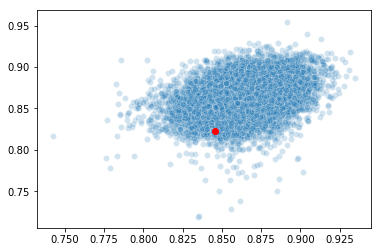

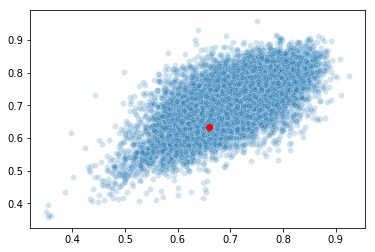

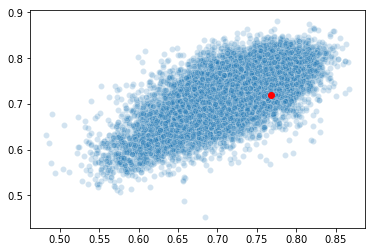

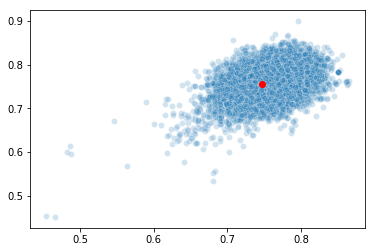

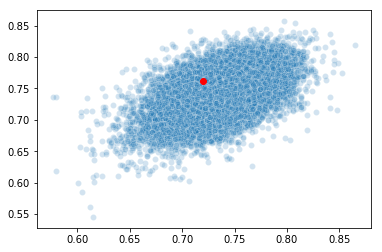

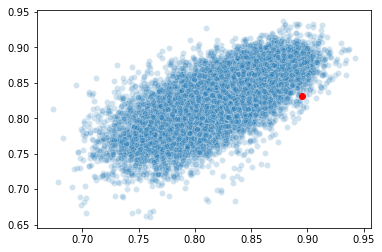

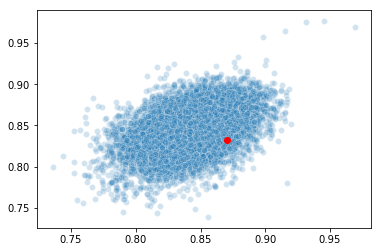

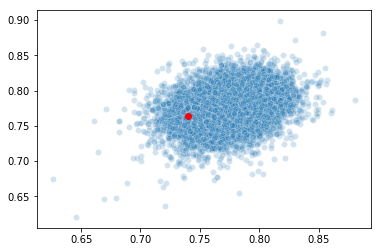

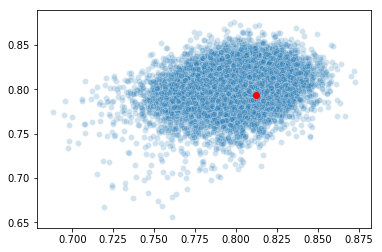

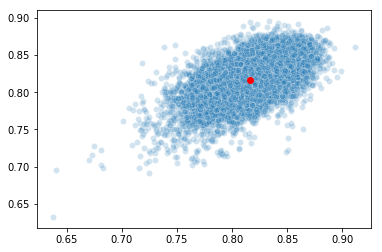

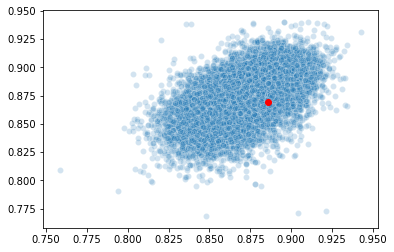

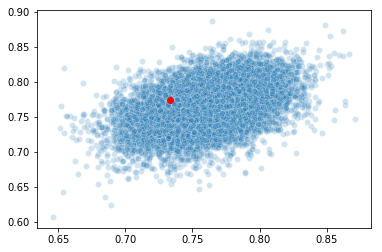

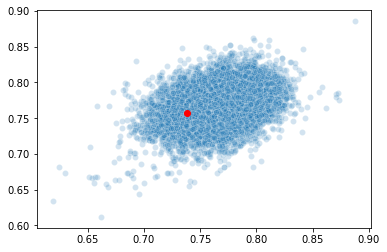

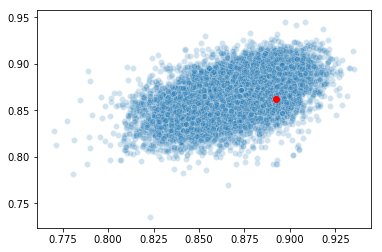

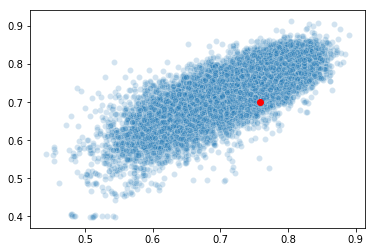

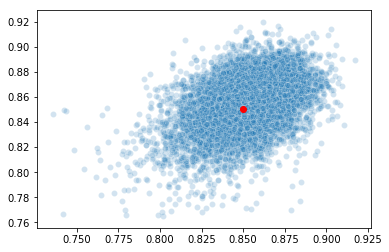

In [65]:
for orga in LOTUS:
    fig = plt.figure()
    data=null_cai[null_cai['Organism'] == orga]
    metric = 'CAI'
    data = data[data['Metric'] == metric]
    sns.scatterplot(x=data[data['Domain'] == "D0"]['Frequency'].values, y=data[data['Domain'] == "D1"]['Frequency'].values, alpha=0.2)
    x = oskars[(oskars['Organism'] == orga) & (oskars['Domain'] == 'LOTUS')]['Value'].values[0]
    y = oskars[(oskars['Organism'] == orga) & (oskars['Domain'] == 'OSK')]['Value'].values[0]
    plt.plot([x], [y], 'ro')

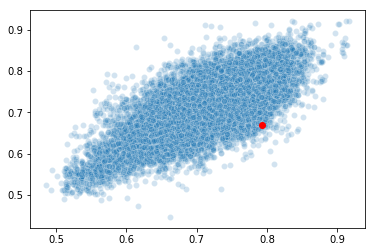

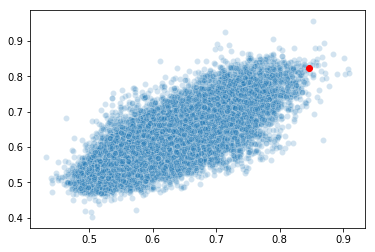

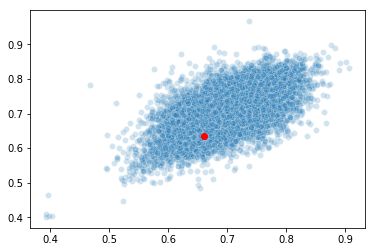

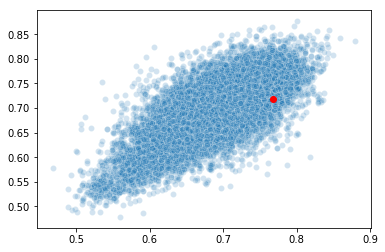

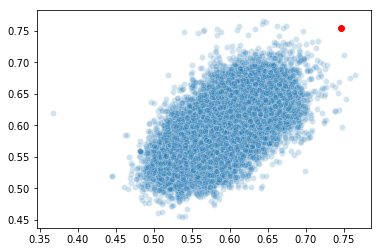

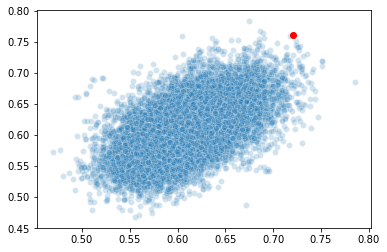

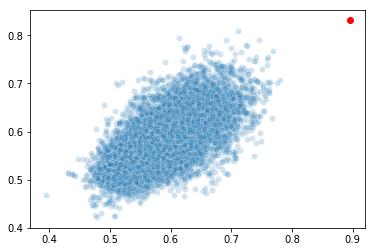

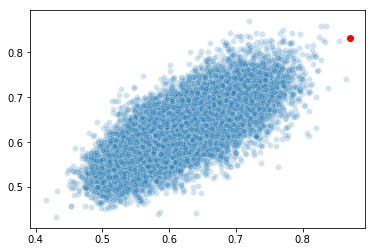

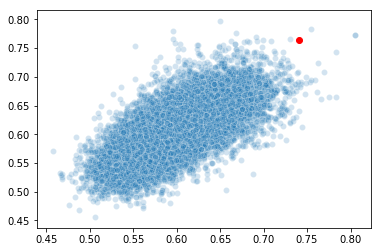

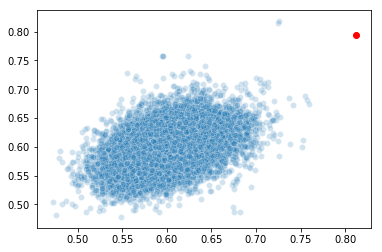

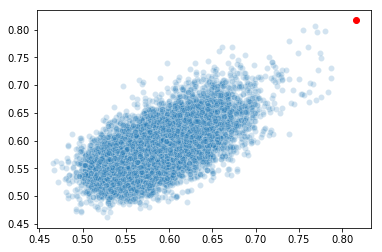

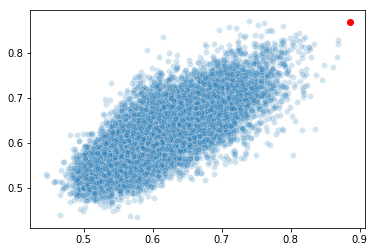

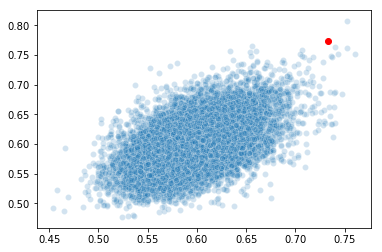

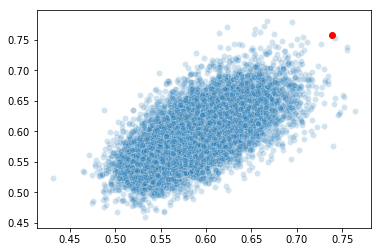

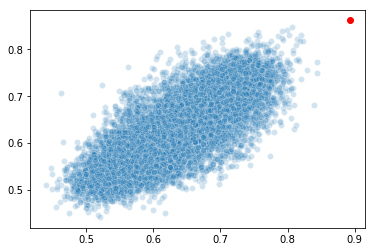

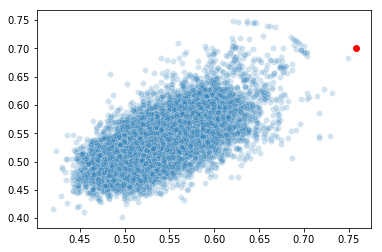

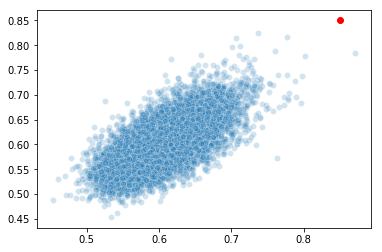

In [66]:
for orga in LOTUS:
    fig = plt.figure()
    data=null_cai[null_cai['Organism'] == orga]
    metric = 'dmelCAI'
    data = data[data['Metric'] == metric]
    sns.scatterplot(x=data[data['Domain'] == "D0"]['Frequency'].values, y=data[data['Domain'] == "D1"]['Frequency'].values, alpha=0.2)
    x = oskars[(oskars['Organism'] == orga) & (oskars['Domain'] == 'LOTUS')]['Value'].values[0]
    y = oskars[(oskars['Organism'] == orga) & (oskars['Domain'] == 'OSK')]['Value'].values[0]
    plt.plot([x], [y], 'ro')

In [67]:
res = []
res_osk = []

for orga in LOTUS:
    data=null_cai[null_cai['Organism'] == orga]
    metric = 'CAI'
    data = data[data['Metric'] == metric]
    diff = data[data['Domain'] == 'D0']['Frequency'].values - data[data['Domain'] == 'D1']['Frequency'].values
    tmp = []
    tmp.append([orga]*len(diff))
    tmp.append([metric]*len(diff))
    tmp.append(diff)
    tmp = np.array(tmp).T.tolist()
    res+=tmp
    
    data=null_cai[null_cai['Organism'] == orga]
    metric = 'dmelCAI'
    data = data[data['Metric'] == metric]
    diff = data[data['Domain'] == 'D0']['Frequency'].values - data[data['Domain'] == 'D1']['Frequency'].values
    tmp = []
    tmp.append([orga]*len(diff))
    tmp.append([metric]*len(diff))
    tmp.append(diff)
    tmp = np.array(tmp).T.tolist()
    res+=tmp
    
    x = oskars[(oskars['Organism'] == orga) & (oskars['Domain'] == 'LOTUS')]['Value'].values[0]
    y = oskars[(oskars['Organism'] == orga) & (oskars['Domain'] == 'OSK')]['Value'].values[0]
    res_osk.append([orga, 'CAI', x-y])
    
    x = dmeloskars[(dmeloskars['Organism'] == orga) & (dmeloskars['Domain'] == 'LOTUS')]['Value'].values[0]
    y = dmeloskars[(dmeloskars['Organism'] == orga) & (dmeloskars['Domain'] == 'OSK')]['Value'].values[0]
    res_osk.append([orga, 'dmelCAI', x-y])


In [68]:
diff = pd.DataFrame(res, columns=['Organism', 'Metric', 'Difference'])
diff['Difference'] = diff['Difference'].astype(float)
diff_oskar = pd.DataFrame(res_osk, columns=['Organism', 'Metric', 'Difference'])

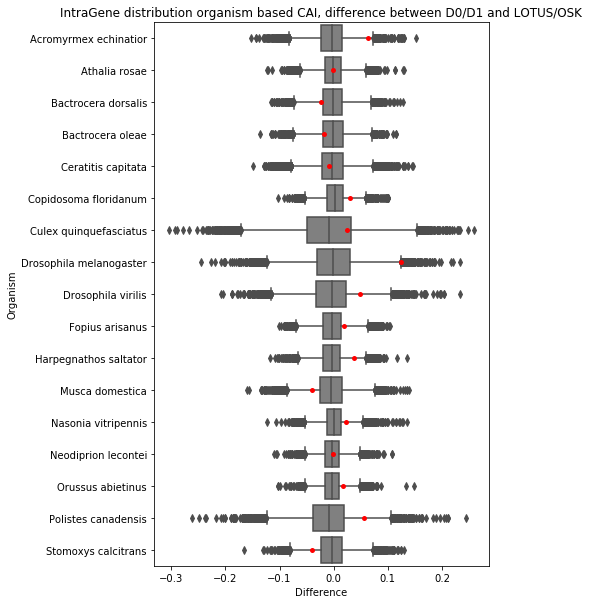

In [69]:
fig = plt.figure(figsize=(6,10))
sns.boxplot(data=diff[diff['Metric'] == 'CAI'], y='Organism', x='Difference', color='Gray', order=order)
sns.swarmplot(data=diff_oskar[diff_oskar['Metric'] == 'CAI'], x="Difference", y="Organism", color='Red', dodge=True, order=order)
plt.title('IntraGene distribution organism based CAI, difference between D0/D1 and LOTUS/OSK')
fig.savefig('IntraGeneDiffCAI.png')
fig.savefig('IntraGeneDiffCAI.pdf')
fig.savefig('IntraGeneDiffCAI.svg')

In [116]:
diff['Organism'].unique()

array(['Drosophila melanogaster', 'Nasonia vitripennis',
       'Culex quinquefasciatus', 'Drosophila virilis',
       'Ceratitis capitata', 'Musca domestica', 'Acromyrmex echinatior',
       'Harpegnathos saltator', 'Bactrocera dorsalis', 'Fopius arisanus',
       'Athalia rosae', 'Orussus abietinus', 'Stomoxys calcitrans',
       'Bactrocera oleae', 'Copidosoma floridanum', 'Polistes canadensis',
       'Neodiprion lecontei'], dtype=object)

Text(0.5, 1.0, 'IntraGene distribution dmel based CAI, difference between D0/D1 and LOTUS/OSK')

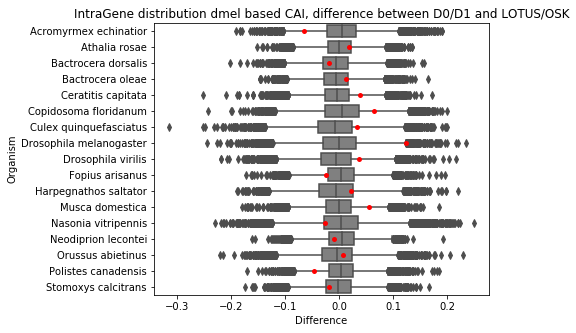

In [70]:
fig = plt.figure(figsize=(6,5))
sns.boxplot(data=diff[diff['Metric'] == 'dmelCAI'], y='Organism', x='Difference', color='Gray', order=order)
sns.swarmplot(data=diff_oskar[diff_oskar['Metric'] == 'dmelCAI'], x="Difference", y="Organism", color='Red', dodge=True, order=order)
plt.title('IntraGene distribution dmel based CAI, difference between D0/D1 and LOTUS/OSK')


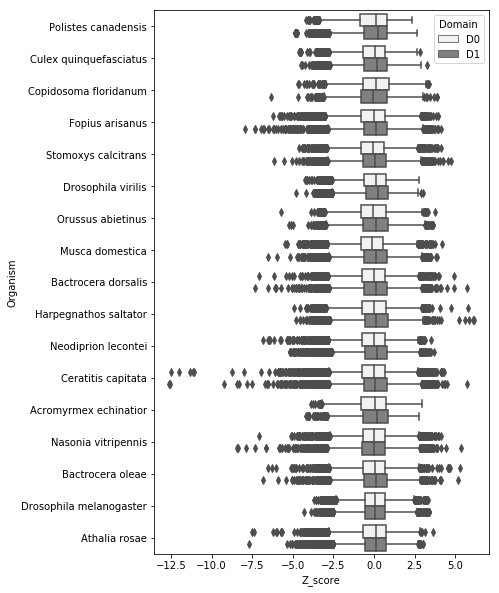

In [106]:
fig = plt.figure(figsize=(6,10))
sns.boxplot(data=null_cai[(null_cai['Metric'] == metric)], x='Z_score', y='Organism', color='Gray', hue='Domain')


In [114]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

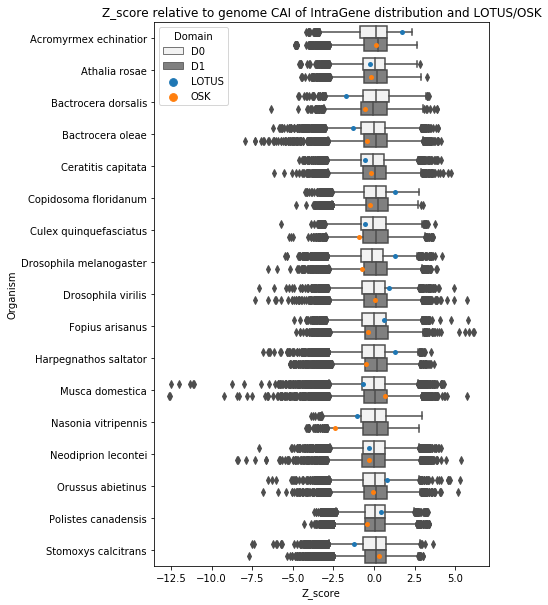

In [71]:
metric = 'CAI'
fig = plt.figure(figsize=(6,10))
sns.boxplot(data=null_cai[(null_cai['Metric'] == metric)], x='Z_score', y='Organism', color='Gray', hue='Domain')
sns.swarmplot(data=osk_zscore, x="Z_score", y="Organism", dodge=True, order=order, hue='Domain')
plt.title('Z_score relative to genome CAI of IntraGene distribution and LOTUS/OSK')
fig.savefig('DomainZscoreCAI.png')
fig.savefig('DomainZscoreCAI.pdf')
fig.savefig('DomainZscoreCAI.svg')

# 5) Analysis of the A3/T3/G3/C3 content between OSK and LOTUS vs genome Intra-Gene distribution

In [72]:
null_osk = {}
for orga in OSKAR:
    seq = OSKAR[orga]
    l = len(seq)
    s = 1
    while s%3 != 0:
        s = np.random.randint(351, l-351)
    null_osk[orga]=[seq[:s], seq[s:]]

In [73]:
null_osk[k][0]

SeqRecord(seq=Seq('ATGACGTCGCAGGAGGCGGTAAAAAAAATGGTTAAATCTTGTATTGTCTCACGC...AAC', SingleLetterAlphabet()), id='NW_015384928_-_LOC107223453_mRNA_-_LOC107223453_CDS', name='NW_015384928_-_LOC107223453_mRNA_-_LOC107223453_CDS', description='NW_015384928_-_LOC107223453_mRNA_-_LOC107223453_CDS Neodiprion lecontei isolate Nlec_01 unplaced genomic scaffold, Nlec1.0, whole genome shotgun sequence', dbxrefs=[])

## Calculate Osk GC3/AT3

In [74]:
osk = []
for k in LOTUS:
    la, lg = GC3(null_osk[k][0])
    sa, sg = GC3(null_osk[k][1])
    osk.append([k, 'LOTUS', 'AT3', la])
    osk.append([k, 'LOTUS', 'GC3', lg])
    osk.append([k, 'SGNH', 'AT3', sa])
    osk.append([k, 'SGNH', 'GC3', sg])

osk = pd.DataFrame(osk, columns=['Organism', 'Domain','Codon','Frequency'] )

## Calculate A3, G3, C3, T3 usage

In [75]:
osk3 = []
for k in LOTUS:
    la, lt, lc, lg = wobble(null_osk[k][0])
    sa, st, sc, sg = wobble(null_osk[k][1])
    osk3.append([k, 'LOTUS', 'A3', la])
    osk3.append([k, 'LOTUS', 'T3', lt])
    osk3.append([k, 'LOTUS', 'C3', lc])
    osk3.append([k, 'LOTUS', 'G3', lg])
    osk3.append([k, 'SGNH', 'A3', sa])
    osk3.append([k, 'SGNH', 'T3', st])
    osk3.append([k, 'SGNH', 'C3', sc])
    osk3.append([k, 'SGNH', 'G3', sg])

osk3 = pd.DataFrame(osk3, columns=['Organism', 'Domain','Codon','Frequency'] )

In [76]:
res = []
res2 = []
for orga in tqdm_notebook(LOTUS):
    for codon in ['A3','T3','C3','G3']:
        a = data3[(data3['Organism'] == orga) & (data3['Codon'] == codon)]['Frequency'].values
        b = osk3[(osk3['Organism'] == orga) & (osk3['Codon'] == codon) & (osk3['Domain'] == 'LOTUS')]['Frequency'].values
        c = osk3[(osk3['Organism'] == orga) & (osk3['Codon'] == codon) & (osk3['Domain'] == 'SGNH')]['Frequency'].values
        Z = Z_score(np.array([b[0],c[0]]), a)
        p_values = stats.norm.sf(abs(Z))*2
        res.append([orga, codon, 'LOTUS' ,Z[0], p_values[0]])
        res.append([orga, codon, 'SGNH' ,Z[1], p_values[1]])
    for codon in ['AT3','GC3']:
        a = data2[(data2['Organism'] == orga) & (data2['Codon'] == codon)]['Frequency'].values
        b = osk[(osk['Organism'] == orga) & (osk['Codon'] == codon) & (osk['Domain'] == 'LOTUS')]['Frequency'].values
        c = osk[(osk['Organism'] == orga) & (osk['Codon'] == codon) & (osk['Domain'] == 'SGNH')]['Frequency'].values
        Z = Z_score(np.array([b[0],c[0]]), a)
        p_values = stats.norm.sf(abs(Z))*2
        res2.append([orga, codon, 'LOTUS' ,Z[0], p_values[0]])
        res2.append([orga, codon, 'SGNH' ,Z[1], p_values[1]])
signi_3_df = pd.DataFrame(res, columns=['Organism','Codon','Domain','Z_score','p-value'])
signi_GC3_df = pd.DataFrame(res2, columns=['Organism','Codon','Domain','Z_score','p-value'])

/home/lblondel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


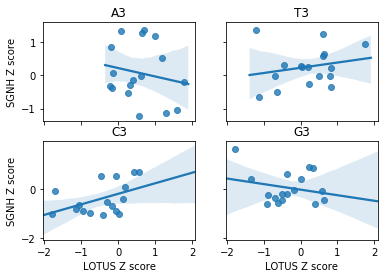

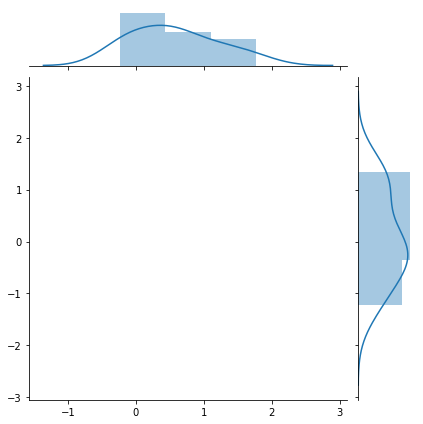

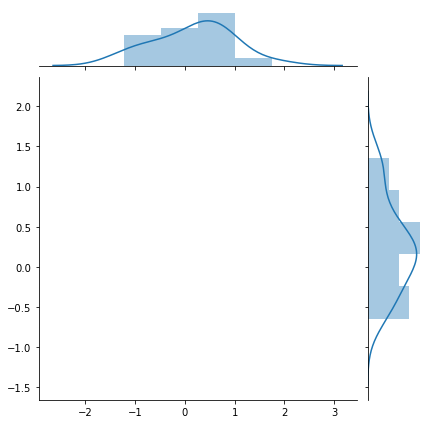

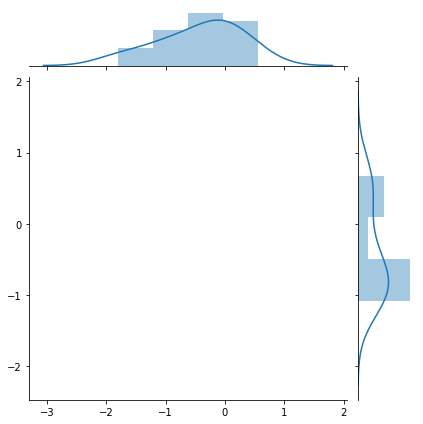

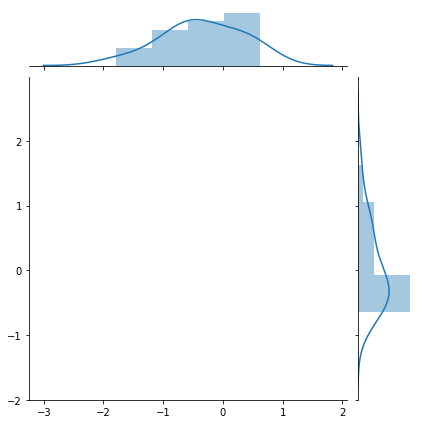

In [77]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
codons = ['A3','T3','C3','G3']
axes = [ax1, ax2, ax3, ax4]
for i in range(4):
    codon = codons[i]
    ax = axes[i]
    x = signi_3_df[(signi_3_df['Domain']=='LOTUS')  & (signi_3_df['Codon']==codon)]['Z_score'].values
    y = signi_3_df[(signi_3_df['Domain']=='SGNH')  & (signi_3_df['Codon']==codon)]['Z_score'].values
    sns.jointplot(x,y,ax=ax,kind="reg")
    ax.set_title(codon)
    if i in [2,3]:
        ax.set_xlabel('LOTUS Z score')
    if i in [0,2]:
        ax.set_ylabel('SGNH Z score')
f.savefig('Oskar_Wobble_Codon_Use.png',dpi=600)

## Plotting Intra-Gene Wobble position Codon usage correlation analysis

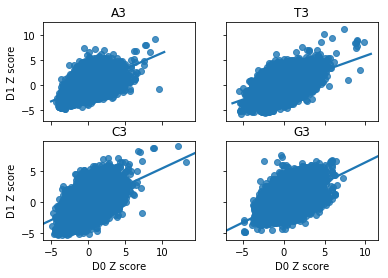

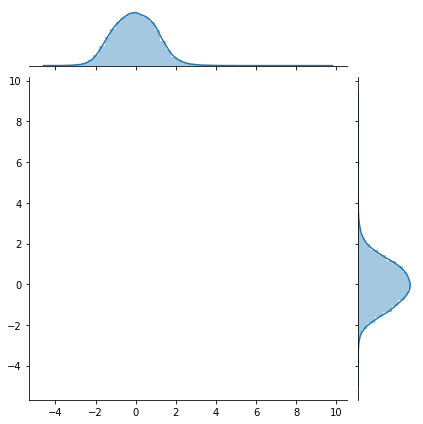

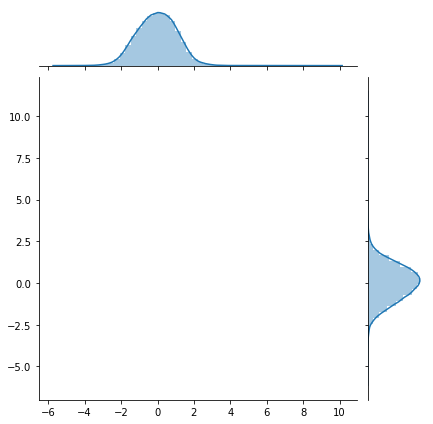

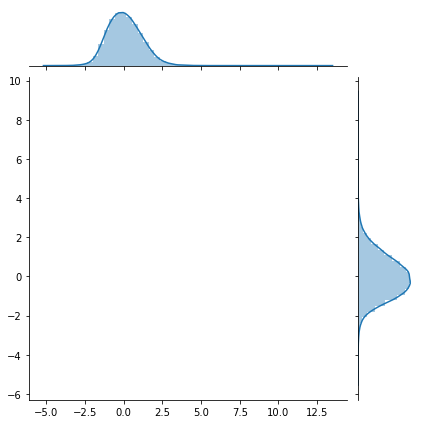

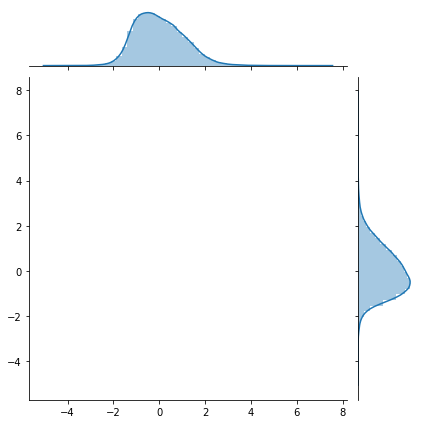

In [78]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
codons = ['A3','T3','C3','G3']
axes = [ax1, ax2, ax3, ax4]
for i in range(4):
    codon = codons[i]
    ax = axes[i]
    x = null_at3gc3[(null_at3gc3['Domain'] == 'D0') & (null_at3gc3['Metric'] == codon)]['Z_score'].values
    y = null_at3gc3[(null_at3gc3['Domain'] == 'D1') & (null_at3gc3['Metric'] == codon)]['Z_score'].values
    sns.jointplot(x,y,ax=ax,kind="reg")
    ax.set_title(codon)
    if i in [2,3]:
        ax.set_xlabel('D0 Z score')
    if i in [0,2]:
        ax.set_ylabel('D1 Z score')
f.savefig('Intra-Gene_Wobble_Position_Codon_Use.png',dpi=600)

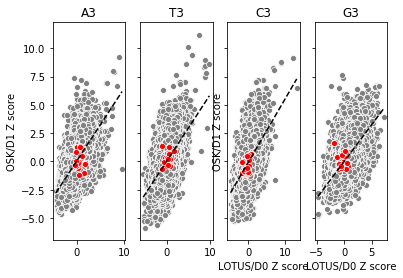

In [79]:
codons = ['A3','T3','C3','G3']

f, axes = plt.subplots(1, len(codons), sharex='col', sharey='row')

for i in range(len(codons)):
    codon = codons[i]
    ax = axes[i]
    x_osk = signi_3_df[(signi_3_df['Domain']=='LOTUS')  & (signi_3_df['Codon']==codon)]['Z_score'].values
    y_osk = signi_3_df[(signi_3_df['Domain']=='SGNH')  & (signi_3_df['Codon']==codon)]['Z_score'].values
    
    x_null = null_at3gc3[(null_at3gc3['Domain'] == 'D0') & (null_at3gc3['Metric'] == codon)]['Z_score'].values
    y_null = null_at3gc3[(null_at3gc3['Domain'] == 'D1') & (null_at3gc3['Metric'] == codon)]['Z_score'].values
    
    a, b, r, p, std = stats.linregress(x_null, y_null)

    x_min = min(x_null)
    y_min = a * x_min + b
    x_max = max(x_null)
    y_max = a * x_max + b
    
    sns.scatterplot(x_null,y_null,ax=ax, color='Gray')
    ax.plot([x_min, x_max], [y_min, y_max], 'k--')
    
    sns.scatterplot(x_osk,y_osk,ax=ax, color='Red')
    ax.set_title(codon)
    if i in [2,3]:
        ax.set_xlabel('LOTUS/D0 Z score')
    if i in [0,2]:
        ax.set_ylabel('OSK/D1 Z score')
f.savefig('Oskar_ATGC3_Codon_Use.png',dpi=600)
f.savefig('Oskar_ATGC3_Codon_Use.pdf',dpi=600)
f.savefig('Oskar_ATGC3_Codon_Use.svg',dpi=600)

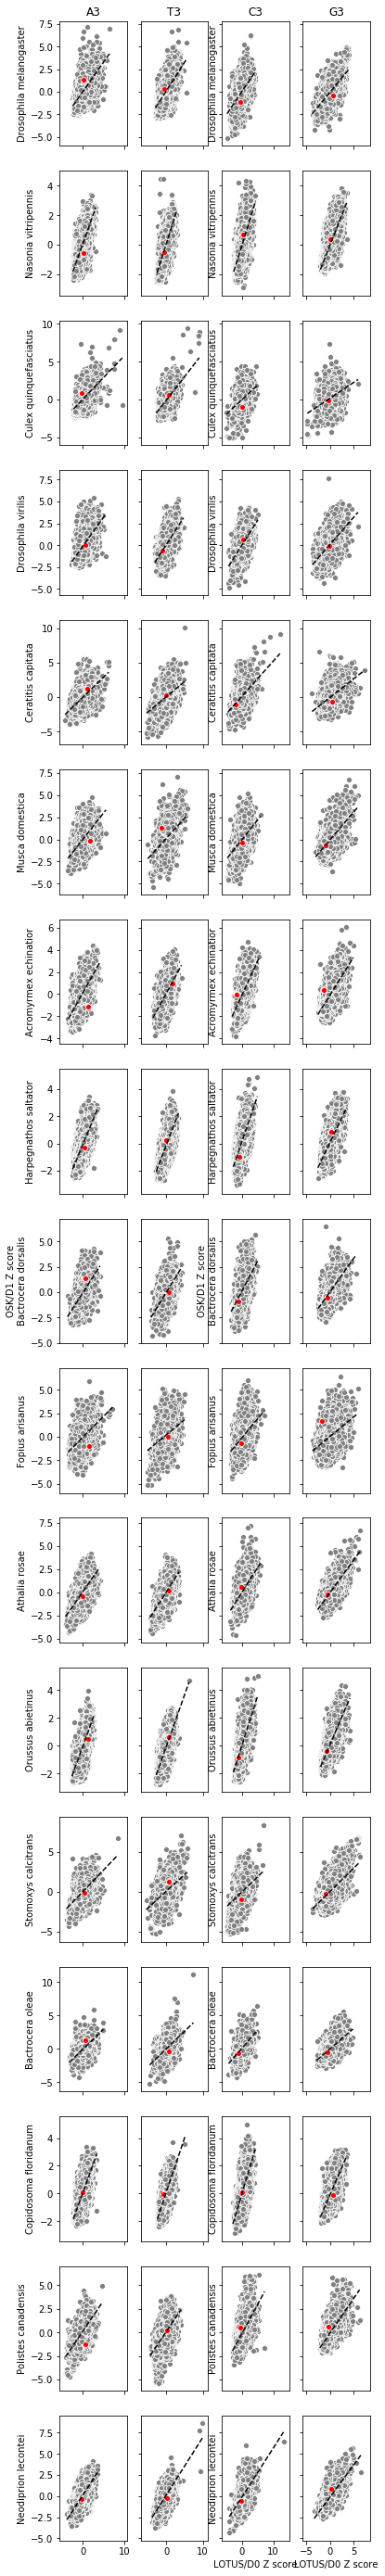

In [80]:
codons = ['A3','T3','C3','G3']

f, axes = plt.subplots(len(LOTUS), len(codons), sharex='col', sharey='row')
f.set_size_inches(6,50)

for o in range(len(LOTUS)):
    orga = list(LOTUS.keys())[o]
    for i in range(len(codons)):
        codon = codons[i]
        ax = axes[o][i]
        x_osk = signi_3_df[(signi_3_df['Organism']==orga) & (signi_3_df['Domain']=='LOTUS')  & (signi_3_df['Codon']==codon)]['Z_score'].values
        y_osk = signi_3_df[(signi_3_df['Organism']==orga) & (signi_3_df['Domain']=='SGNH')  & (signi_3_df['Codon']==codon)]['Z_score'].values

        x_null = null_at3gc3[(null_at3gc3['Organism'] == orga) & (null_at3gc3['Domain'] == 'D0') & (null_at3gc3['Metric'] == codon)]['Z_score'].values
        y_null = null_at3gc3[(null_at3gc3['Organism'] == orga) & (null_at3gc3['Domain'] == 'D1') & (null_at3gc3['Metric'] == codon)]['Z_score'].values
    
        
        a, b, r, p, std = stats.linregress(x_null, y_null)
        
        x_min = min(x_null)
        y_min = a * x_min + b
        x_max = max(x_null)
        y_max = a * x_max + b
        
        sns.scatterplot(x_null,y_null,ax=ax, color='Gray')
        ax.plot([x_min, x_max], [y_min, y_max], 'k--')
        sns.scatterplot(x_osk,y_osk,ax=ax, color='Red')
        if o == 0:
            ax.set_title(codon)
        if o == len(LOTUS) - 1:
            if i in [2,3]:
                ax.set_xlabel('LOTUS/D0 Z score')
        if o == int(len(LOTUS) / 2):
            if i in [0,2]:
                ax.set_ylabel('OSK/D1 Z score\n'+orga)
        else:
            if i in [0,2]:
                    ax.set_ylabel(orga)

f.savefig('Oskar_ATGC3_Codon_Use_supp.png',dpi=600)
f.savefig('Oskar_ATGC3_Codon_Use_supp.svg',dpi=600)
f.savefig('Oskar_ATGC3_Codon_Use_supp.pdf',dpi=600)

In [81]:
pearson = []
codons = ['A3','T3','C3','G3']
for i in range(4):
    codon = codons[i]
    x = signi_3_df[(signi_3_df['Domain']=='LOTUS')  & (signi_3_df['Codon']==codon)]['Z_score'].values
    y = signi_3_df[(signi_3_df['Domain']=='SGNH')  & (signi_3_df['Codon']==codon)]['Z_score'].values
    r,p = stats.pearsonr(x,y)
    pearson.append(['Oskar',codon, r**2, p])
    x = null_at3gc3[(null_at3gc3['Domain'] == 'D0') & (null_at3gc3['Metric'] == codon)]['Z_score'].values
    y = null_at3gc3[(null_at3gc3['Domain'] == 'D1') & (null_at3gc3['Metric'] == codon)]['Z_score'].values
    r,p = stats.pearsonr(x,y)
    pearson.append(['Intra-Gene',codon, r**2, p])
pearson = pd.DataFrame(pearson, columns=['Distribution','Codon','r-value','p-value'])
pearson

Distribution Codon   r-value   p-value
0        Oskar    A3  0.033712  0.480557
1   Intra-Gene    A3  0.397557  0.000000
2        Oskar    T3  0.046413  0.406295
3   Intra-Gene    T3  0.335963  0.000000
4        Oskar    C3  0.211820  0.063029
5   Intra-Gene    C3  0.300544  0.000000
6        Oskar    G3  0.055814  0.361292
7   Intra-Gene    G3  0.407705  0.000000

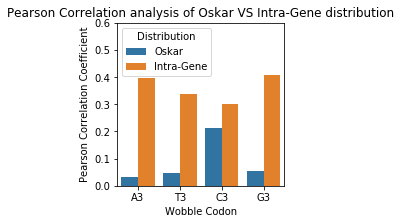

In [82]:
f = plt.figure(figsize=(3,3))
sns.barplot(data=pearson, x='Codon', y='r-value', hue='Distribution')
plt.ylabel('Pearson Correlation Coefficient')
plt.xlabel('Wobble Codon')
plt.title('Pearson Correlation analysis of Oskar VS Intra-Gene distribution')
plt.ylim(0,0.6)
f.savefig('wobble_Pearson_correlation.png',dpi=600)
f.savefig('wobble_Pearson_correlation.pdf')

# 6) Analysis of the AT3/GC3 content between OSK and LOTUS vs genome Intra-Gene distribution

## Plotting GC3 content Intra Gene distribution and OSK vs LOTUS

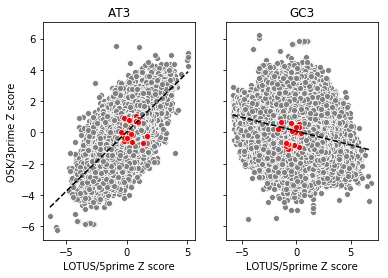

In [92]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
codons = ['AT3','GC3']
axes = [ax1, ax2]
for i in range(2):
    codon = codons[i]
    ax = axes[i]
    x_osk = signi_GC3_df[(signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    y_osk = signi_GC3_df[(signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    
    x_null = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Metric'] == codon)]['Z_score'].values
    y_null = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Metric'] == codon)]['Z_score'].values
    
    a, b, r, p, std = stats.linregress(x_null, y_null)


    x_min = min(x_null)
    y_min = a * x_min + b
    x_max = max(x_null)
    y_max = a * x_max + b
    
    sns.scatterplot(x_null,y_null,ax=ax, color='Gray')
    ax.plot([x_min, x_max], [y_min, y_max], 'k--')
    
    sns.scatterplot(x_osk,y_osk,ax=ax, color='Red')
    ax.set_title(codon)
    if i in [1,0]:
        ax.set_xlabel('LOTUS/5prime Z score')
    if i in [0,2]:
        ax.set_ylabel('OSK/3prime Z score')
f.savefig('Oskar_AT3_GC3_Codon_Use.png',dpi=600)
f.savefig('Oskar_AT3_GC3_Codon_Use.pdf',dpi=600)
f.savefig('Oskar_AT3_GC3_Codon_Use.svg',dpi=600)

In [84]:
a, b, r, p, std = stats.linregress(x_null, y_null)

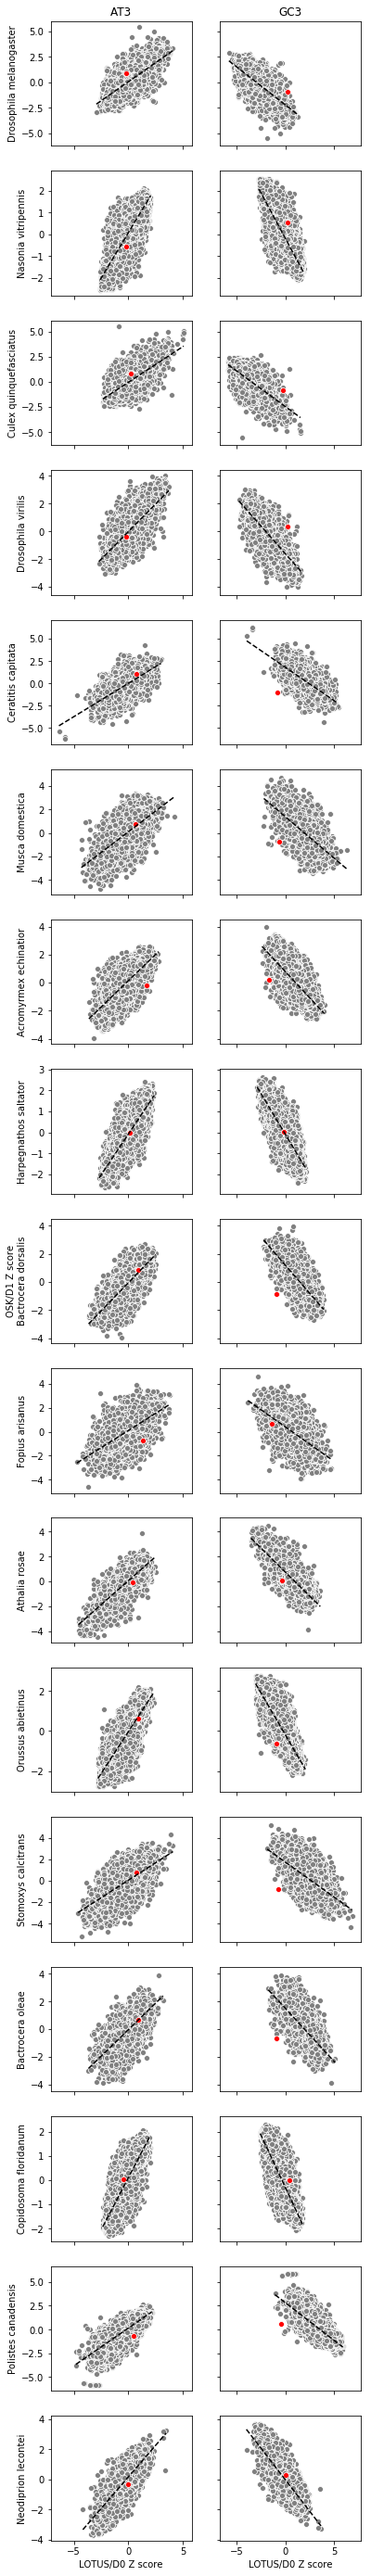

In [85]:
f, axes = plt.subplots(len(LOTUS), 2, sharex='col', sharey='row')
f.set_size_inches(6,50)
codons = ['AT3','GC3']
for o in range(len(LOTUS)):
    orga = list(LOTUS.keys())[o]
    for i in range(2):
        codon = codons[i]
        ax = axes[o][i]
        x_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
        y_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values

        x_null = null_codon3[(null_codon3['Organism'] == orga) & (null_codon3['Domain'] == 'D0') & (null_codon3['Metric'] == codon)]['Z_score'].values
        y_null = null_codon3[(null_codon3['Organism'] == orga) & (null_codon3['Domain'] == 'D1') & (null_codon3['Metric'] == codon)]['Z_score'].values
        
        a, b, r, p, std = stats.linregress(x_null, y_null)
        
        x_min = min(x_null)
        y_min = a * x_min + b
        x_max = max(x_null)
        y_max = a * x_max + b
        
        sns.scatterplot(x_null,y_null,ax=ax, color='Gray')
        ax.plot([x_min, x_max], [y_min, y_max], 'k--')
        sns.scatterplot(x_osk,y_osk,ax=ax, color='Red')
        if o == 0:
            ax.set_title(codon)
        if o == len(LOTUS) - 1:
            if i in [1,0]:
                ax.set_xlabel('LOTUS/D0 Z score')
        if o == int(len(LOTUS) / 2):
            if i in [0,2]:
                ax.set_ylabel('OSK/D1 Z score\n'+orga)
        else:
            if i in [0,2]:
                    ax.set_ylabel(orga)

f.savefig('Oskar_AT3_GC3_Codon_Use_supp.png',dpi=600)
f.savefig('Oskar_AT3_GC3_Codon_Use_supp.svg',dpi=600)
f.savefig('Oskar_AT3_GC3_Codon_Use_supp.pdf',dpi=600)

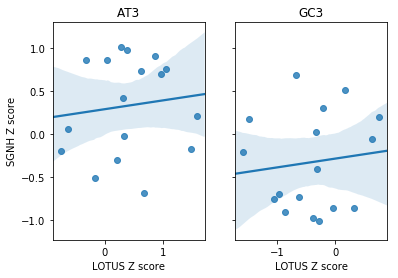

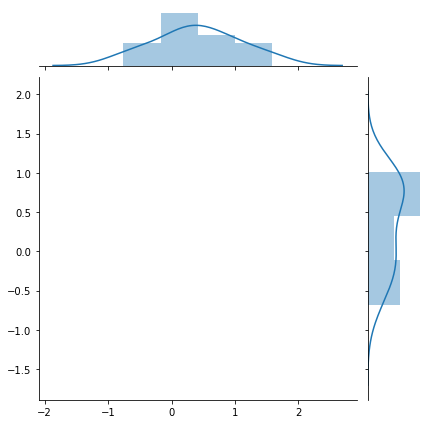

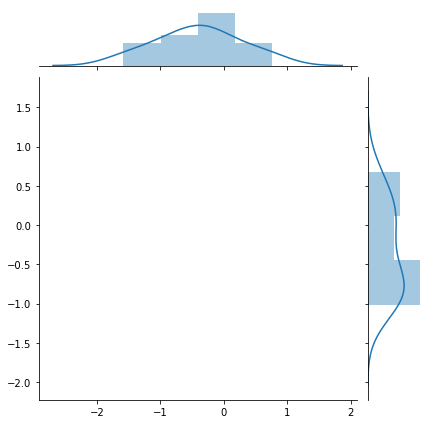

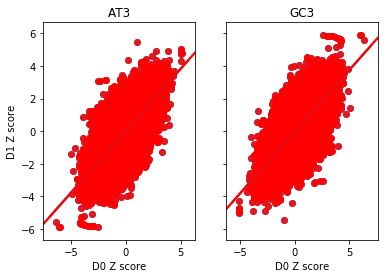

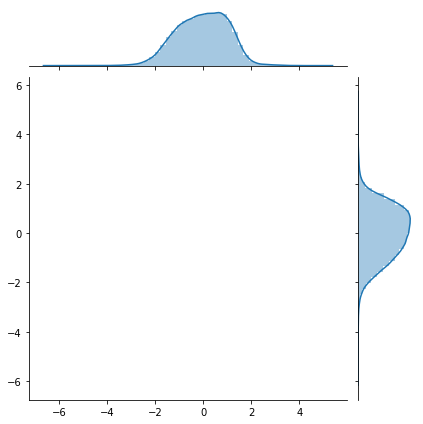

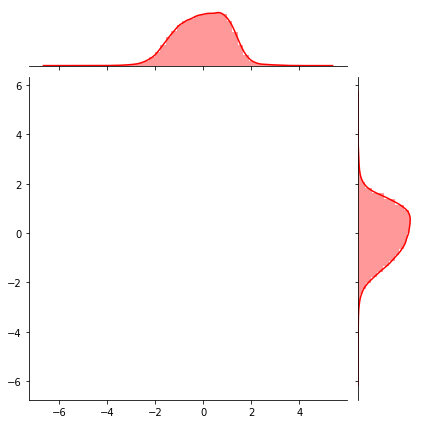

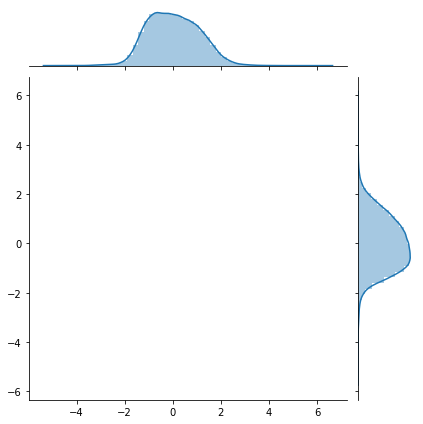

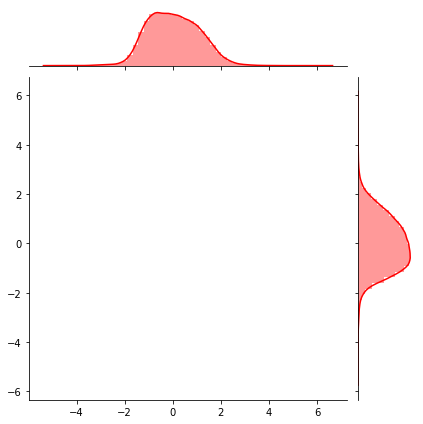

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
codons = ['AT3','GC3']
axes = [ax1, ax2]
for i in range(2):
    codon = codons[i]
    ax = axes[i]
    x = signi_GC3_df[(signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    y = signi_GC3_df[(signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    sns.jointplot(x,y,ax=ax,kind="reg")
    ax.set_title(codon)
    if i in [1,0]:
        ax.set_xlabel('LOTUS Z score')
    if i in [0,2]:
        ax.set_ylabel('SGNH Z score')
f.savefig('Oskar_GC3_Codon_Use.png',dpi=600)

f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
codons = ['AT3','GC3']
axes = [ax1, ax2]
for i in range(2):
    codon = codons[i]
    ax = axes[i]
    x = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Metric'] == codon)]['Z_score'].values
    y = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Metric'] == codon)]['Z_score'].values
    sns.jointplot(x,y, ax=ax, kind="reg")
    sns.jointplot(x,y, ax=ax,kind="reg", color="Red")
    ax.set_title(codon)
    if i in [1,0]:
        ax.set_xlabel('D0 Z score')
    if i in [0,2]:
        ax.set_ylabel('D1 Z score')
f.savefig('Intra-Gene_GC3_Codon_Use.png', dpi=600)

## Pearson correlation calculations

In [54]:
pearson = []
codons = ['AT3','GC3']
for i in range(2):
    codon = codons[i]
    x = signi_GC3_df[(signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    y = signi_GC3_df[(signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    r,p = stats.pearsonr(x,y)
    pearson.append(['Oskar',codon, r**2, p])
    x = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Metric'] == codon)]['Z_score'].values
    y = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Metric'] == codon)]['Z_score'].values
    r,p = stats.pearsonr(x,y)
    pearson.append(['Intra-Gene',codon, r**2, p])
pearson = pd.DataFrame(pearson, columns=['Distribution','Codon','r-value','p-value'])
pearson

Distribution Codon   r-value   p-value
0        Oskar   AT3  0.014441  0.645947
1   Intra-Gene   AT3  0.560888  0.000000
2        Oskar   GC3  0.014441  0.645947
3   Intra-Gene   GC3  0.560888  0.000000

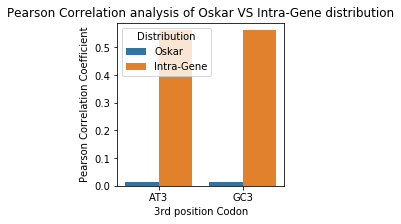

In [55]:
f = plt.figure(figsize=(3,3))
sns.barplot(data=pearson, x='Codon', y='r-value', hue='Distribution')
plt.ylabel('Pearson Correlation Coefficient')
plt.xlabel('3rd position Codon')
plt.title('Pearson Correlation analysis of Oskar VS Intra-Gene distribution')
f.savefig('GC3_Pearson_correlation.png',dpi=600)
f.savefig('GC3_Pearson_correlation.pdf')

# 7) Analysis of the residuals of the linear regression of genome AT3/GC3 content

In [56]:
codons = ['AT3','GC3']
for i in range(2):
    codon = codons[i]
    print(codon)
    x = null_codon3[(null_codon3['Domain'] == 'D0')  & (null_codon3['Metric'] == codon)]['Z_score'].values
    y = null_codon3[(null_codon3['Domain'] == 'D1')  & (null_codon3['Metric'] == codon)]['Z_score'].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print(slope, intercept, r_value, p_value, std_err)
    print(stats.pearsonr(x,y))
    x = signi_GC3_df[(signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    y = signi_GC3_df[(signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print(slope, intercept, r_value, p_value, std_err)
    print(stats.pearsonr(x,y))

AT3
0.757655893675 0.0324875104987 0.748924707918 0.0 0.00131472438496
(0.74892470791796928, 0.0)
0.102312872675 0.287059236555 0.120168756119 0.645947157158 0.218240074415
(0.12016875611911092, 0.6459471571575659)
GC3
0.757655893675 -0.0324875104987 0.748924707918 0.0 0.00131472438496
(0.74892470791796917, 0.0)
0.102312872675 -0.287059236555 0.120168756119 0.645947157158 0.218240074415
(0.12016875611911011, 0.64594715715756834)


In [57]:
from sklearn import datasets, linear_model

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


13015
Coefficients: 
 [[ 0.7975978]]
Residual sum of squares: 0.42
Residual sum of squares Osk: 0.00
Variance score: 0.63


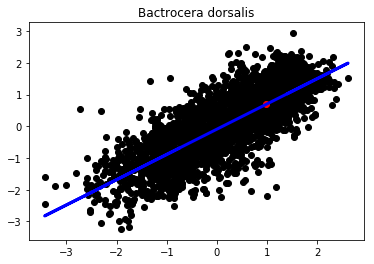

15692
Coefficients: 
 [[ 0.65099481]]
Residual sum of squares: 0.79
Residual sum of squares Osk: 0.00
Variance score: 0.36


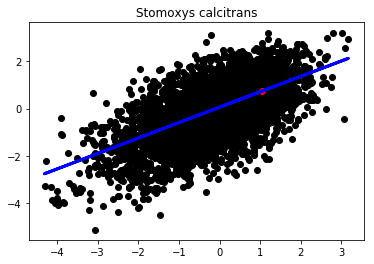

11007
Coefficients: 
 [[ 0.85056191]]
Residual sum of squares: 0.35
Residual sum of squares Osk: 0.39
Variance score: 0.68


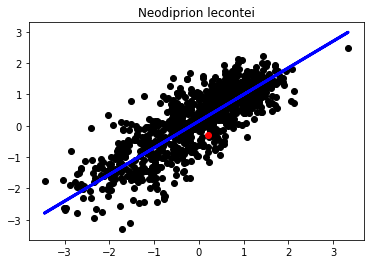

27146
Coefficients: 
 [[ 0.74022909]]
Residual sum of squares: 0.57
Residual sum of squares Osk: 0.71
Variance score: 0.52


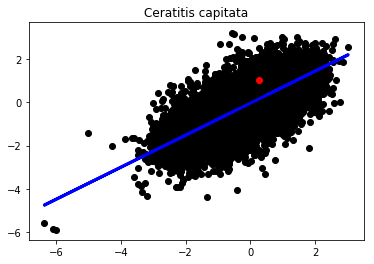

13058
Coefficients: 
 [[ 0.84055874]]
Residual sum of squares: 0.29
Residual sum of squares Osk: 0.05
Variance score: 0.71


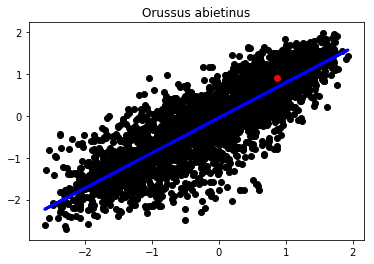

17215
Coefficients: 
 [[ 0.84212098]]
Residual sum of squares: 0.32
Residual sum of squares Osk: 0.19
Variance score: 0.69


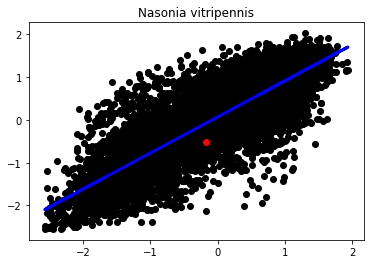

14133
Coefficients: 
 [[ 0.7547738]]
Residual sum of squares: 0.37
Residual sum of squares Osk: 0.01
Variance score: 0.67


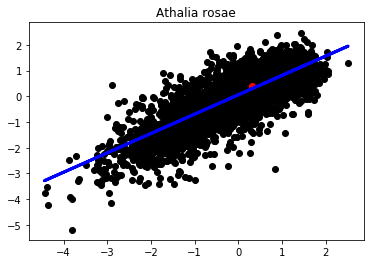

14995
Coefficients: 
 [[ 0.76599105]]
Residual sum of squares: 0.29
Residual sum of squares Osk: 0.04
Variance score: 0.71


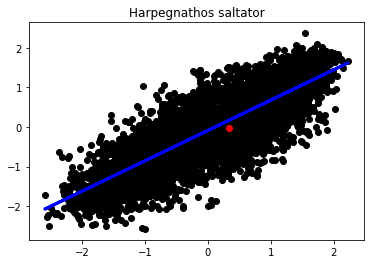

12333
Coefficients: 
 [[ 0.71796377]]
Residual sum of squares: 0.51
Residual sum of squares Osk: 0.59
Variance score: 0.47


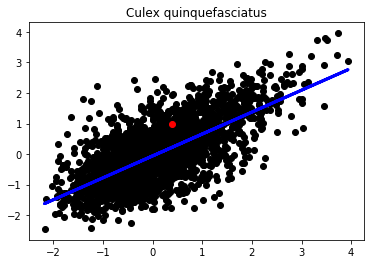

12270
Coefficients: 
 [[ 0.7688955]]
Residual sum of squares: 0.54
Residual sum of squares Osk: 0.08
Variance score: 0.53


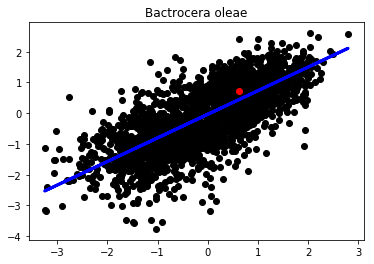

17904
Coefficients: 
 [[ 0.70120728]]
Residual sum of squares: 0.69
Residual sum of squares Osk: 0.53
Variance score: 0.43


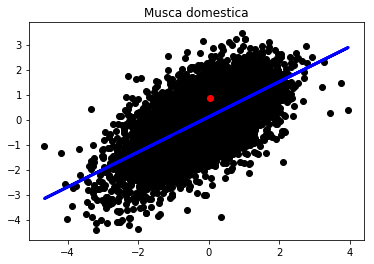

14874
Coefficients: 
 [[ 0.74869241]]
Residual sum of squares: 0.43
Residual sum of squares Osk: 1.21
Variance score: 0.60


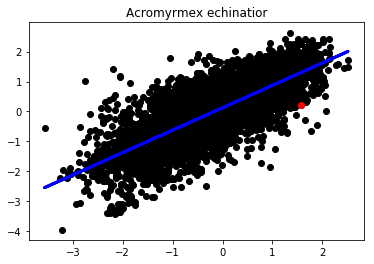

21487
Coefficients: 
 [[ 0.75177536]]
Residual sum of squares: 0.50
Residual sum of squares Osk: 1.08
Variance score: 0.54


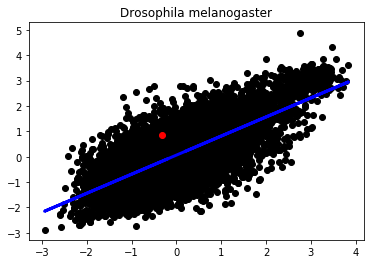

14195
Coefficients: 
 [[ 0.79512116]]
Residual sum of squares: 0.34
Residual sum of squares Osk: 1.82
Variance score: 0.70


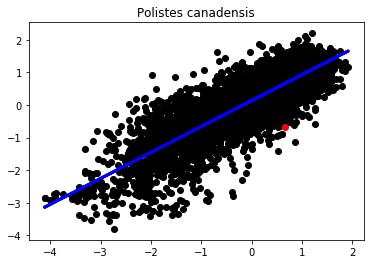

14829
Coefficients: 
 [[ 0.75863625]]
Residual sum of squares: 0.50
Residual sum of squares Osk: 0.16
Variance score: 0.65


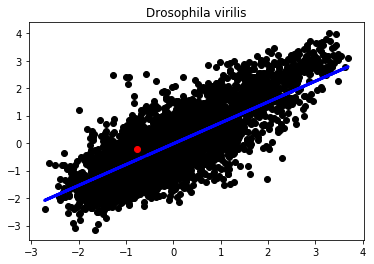

13656
Coefficients: 
 [[ 0.59327752]]
Residual sum of squares: 0.71
Residual sum of squares Osk: 1.32
Variance score: 0.29


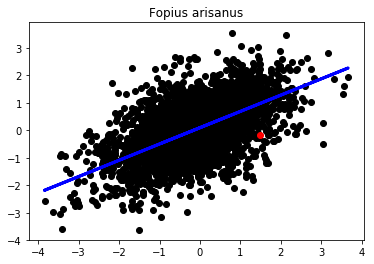

12193
Coefficients: 
 [[ 0.86293906]]
Residual sum of squares: 0.32
Residual sum of squares Osk: 0.26
Variance score: 0.72


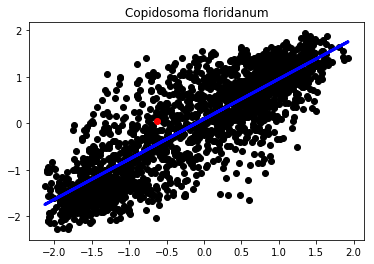

In [58]:
codon = 'AT3'
residuals= []
for orga in LOTUS:
    # Split the data into training/testing sets
    X = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    print(len(X))
    X_train = np.array([X[:10000]]).T
    X_test = np.array([X[10000:]]).T
    X_osk = np.array([signi_GC3_df[(signi_GC3_df['Domain']=='LOTUS') & (signi_GC3_df['Organism']== orga) & (signi_GC3_df['Codon']==codon)]['Z_score'].values]).T
    # Split the targets into training/testing sets
    Y = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    y_train = np.array([Y[:10000]]).T
    y_test = np.array([Y[10000:]]).T
    y_osk = np.array([signi_GC3_df[(signi_GC3_df['Domain']=='SGNH') & (signi_GC3_df['Organism']== orga) & (signi_GC3_df['Codon']==codon)]['Z_score'].values]).T

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean square error
    print("Residual sum of squares: %.2f"
          % np.mean((regr.predict(X_test) - y_test) ** 2))
    for i in ((regr.predict(X_test) - y_test) ** 2):
        residuals.append(['Intra-Gene', i[0]])
    print("Residual sum of squares Osk: %.2f"
          % np.mean((regr.predict(X_osk) - y_osk) ** 2))
    residuals.append(['Oskar', np.mean((regr.predict(X_osk) - y_osk) ** 2)])
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, y_test))

    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, regr.predict(X_test), color='blue',
             linewidth=3)
    plt.scatter(X_osk, y_osk,  color='red')
    plt.title(orga)
    plt.show()
residuals = pd.DataFrame(residuals, columns=['Distribution', 'Residuals'])

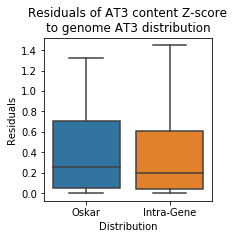

In [59]:
f = plt.figure(figsize=(3,3))
sns.boxplot(data=residuals,x='Distribution',y='Residuals', showfliers=False, order=['Oskar','Intra-Gene'])
plt.title('Residuals of AT3 content Z-score\nto genome AT3 distribution')
f.savefig('AT3_Residuals.png',dpi = 600)
f.savefig('AT3_Residuals.pdf')

13015
Coefficients: 
 [[ 0.7975978]]
Residual sum of squares: 0.42
Residual sum of squares Osk: 0.00
Variance score: 0.63


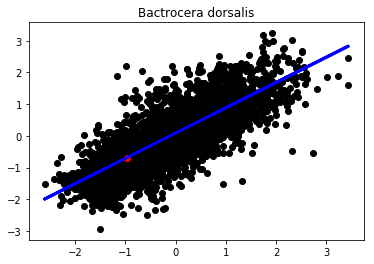

15692
Coefficients: 
 [[ 0.65099481]]
Residual sum of squares: 0.79
Residual sum of squares Osk: 0.00
Variance score: 0.36


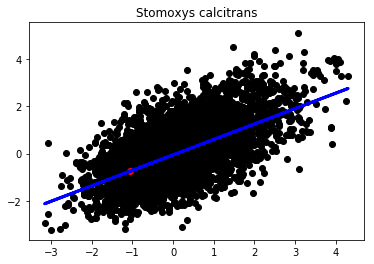

11007
Coefficients: 
 [[ 0.85056191]]
Residual sum of squares: 0.35
Residual sum of squares Osk: 0.39
Variance score: 0.68


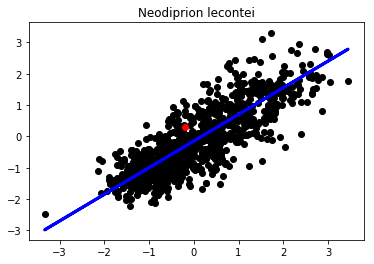

27146
Coefficients: 
 [[ 0.74022909]]
Residual sum of squares: 0.57
Residual sum of squares Osk: 0.71
Variance score: 0.52


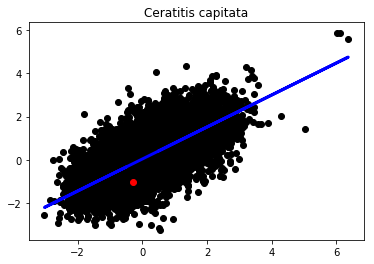

13058
Coefficients: 
 [[ 0.84055874]]
Residual sum of squares: 0.29
Residual sum of squares Osk: 0.05
Variance score: 0.71


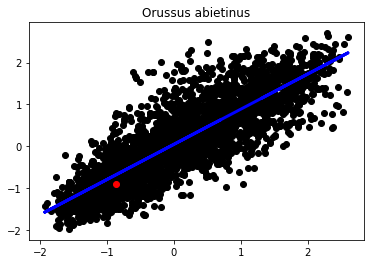

17215
Coefficients: 
 [[ 0.84212098]]
Residual sum of squares: 0.32
Residual sum of squares Osk: 0.19
Variance score: 0.69


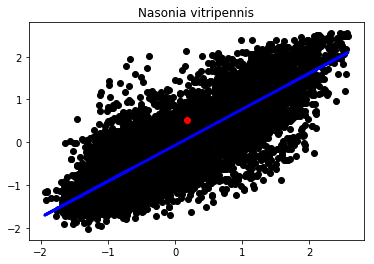

14133
Coefficients: 
 [[ 0.7547738]]
Residual sum of squares: 0.37
Residual sum of squares Osk: 0.01
Variance score: 0.67


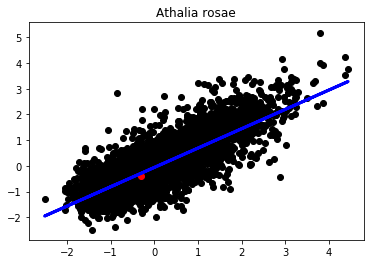

14995
Coefficients: 
 [[ 0.76599105]]
Residual sum of squares: 0.29
Residual sum of squares Osk: 0.04
Variance score: 0.71


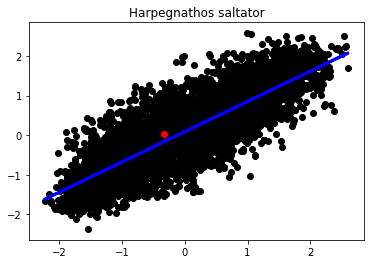

12333
Coefficients: 
 [[ 0.71796377]]
Residual sum of squares: 0.51
Residual sum of squares Osk: 0.59
Variance score: 0.47


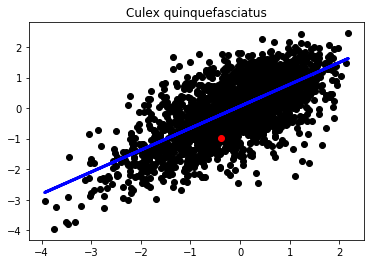

12270
Coefficients: 
 [[ 0.7688955]]
Residual sum of squares: 0.54
Residual sum of squares Osk: 0.08
Variance score: 0.53


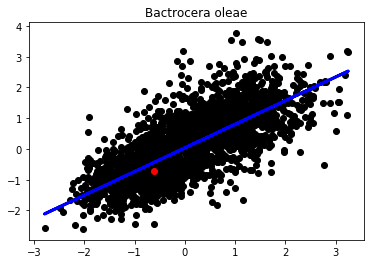

17904
Coefficients: 
 [[ 0.70120728]]
Residual sum of squares: 0.69
Residual sum of squares Osk: 0.53
Variance score: 0.43


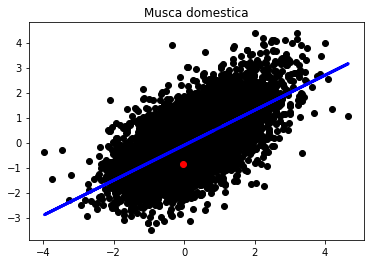

14874
Coefficients: 
 [[ 0.74869241]]
Residual sum of squares: 0.43
Residual sum of squares Osk: 1.21
Variance score: 0.60


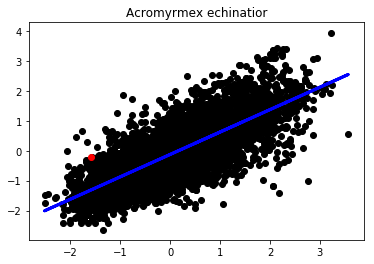

21487
Coefficients: 
 [[ 0.75177536]]
Residual sum of squares: 0.50
Residual sum of squares Osk: 1.08
Variance score: 0.54


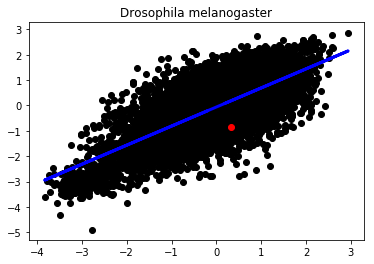

14195
Coefficients: 
 [[ 0.79512116]]
Residual sum of squares: 0.34
Residual sum of squares Osk: 1.82
Variance score: 0.70


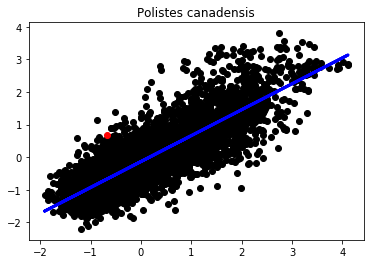

14829
Coefficients: 
 [[ 0.75863625]]
Residual sum of squares: 0.50
Residual sum of squares Osk: 0.16
Variance score: 0.65


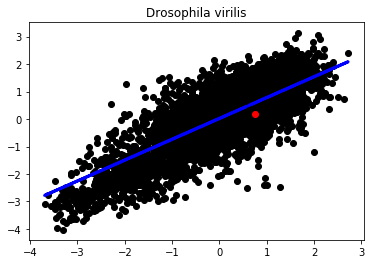

13656
Coefficients: 
 [[ 0.59327752]]
Residual sum of squares: 0.71
Residual sum of squares Osk: 1.32
Variance score: 0.29


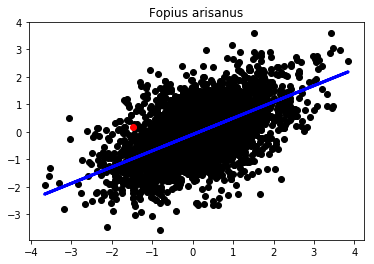

12193
Coefficients: 
 [[ 0.86293906]]
Residual sum of squares: 0.32
Residual sum of squares Osk: 0.26
Variance score: 0.72


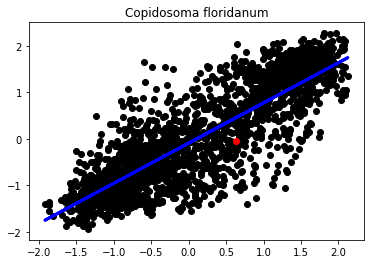

In [60]:
codon = 'GC3'
residuals= []
for orga in LOTUS:
    # Split the data into training/testing sets
    X = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    print(len(X))
    X_train = np.array([X[:10000]]).T
    X_test = np.array([X[10000:]]).T
    X_osk = np.array([signi_GC3_df[(signi_GC3_df['Domain']=='LOTUS') & (signi_GC3_df['Organism']== orga) & (signi_GC3_df['Codon']==codon)]['Z_score'].values]).T
    # Split the targets into training/testing sets
    Y = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    y_train = np.array([Y[:10000]]).T
    y_test = np.array([Y[10000:]]).T
    y_osk = np.array([signi_GC3_df[(signi_GC3_df['Domain']=='SGNH') & (signi_GC3_df['Organism']== orga) & (signi_GC3_df['Codon']==codon)]['Z_score'].values]).T

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean square error
    print("Residual sum of squares: %.2f"
          % np.mean((regr.predict(X_test) - y_test) ** 2))
    for i in ((regr.predict(X_test) - y_test) ** 2):
        residuals.append(['Intra-Gene', i[0]])
    print("Residual sum of squares Osk: %.2f"
          % np.mean((regr.predict(X_osk) - y_osk) ** 2))
    residuals.append(['Oskar', np.mean((regr.predict(X_osk) - y_osk) ** 2)])
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, y_test))

    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, regr.predict(X_test), color='blue',
             linewidth=3)
    plt.scatter(X_osk, y_osk,  color='red')
    plt.title(orga)
    plt.show()
residuals = pd.DataFrame(residuals, columns=['Distribution', 'Residuals'])

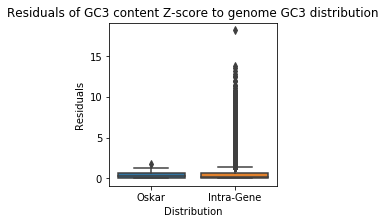

In [61]:
f = plt.figure(figsize=(3,3))
sns.boxplot(data=residuals,x='Distribution',y='Residuals', order=['Oskar','Intra-Gene'])
plt.title('Residuals of GC3 content Z-score to genome GC3 distribution')
f.savefig('GC3_Residuals.png',dpi = 600)
f.savefig('GC3_Residuals.svg',dpi = 600)
f.savefig('GC3_Residuals.pdf')

In [62]:
x = residuals[(residuals['Distribution'] == 'Intra-Gene')]['Residuals'].values
y = residuals[(residuals['Distribution'] == 'Oskar')]['Residuals'].values
print(codon, stats.mannwhitneyu(x,y))

GC3 MannwhitneyuResult(statistic=718142.0, pvalue=0.33086373508511679)


In [ ]:
f, axes = plt.subplots(len(LOTUS), 2, sharex='col', sharey='row')
f.set_size_inches(6,50)
codons = ['AT3','GC3']
for o in range(len(LOTUS)):
    orga = list(LOTUS.keys())[o]
    for i in range(2):
        codon = codons[i]
        ax = axes[o][i]
        x_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
        y_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values

        x_null = null_codon3[(null_codon3['Organism'] == orga) & (null_codon3['Domain'] == 'D0') & (null_codon3['Metric'] == codon)]['Z_score'].values
        y_null = null_codon3[(null_codon3['Organism'] == orga) & (null_codon3['Domain'] == 'D1') & (null_codon3['Metric'] == codon)]['Z_score'].values
        
        a, b, r, p, std = stats.linregress(x_null, y_null)
        
        x_min = min(x_null)
        y_min = a * x_min + b
        x_max = max(x_null)
        y_max = a * x_max + b
        
        sns.scatterplot(x_null,y_null,ax=ax, color='Gray')
        ax.plot([x_min, x_max], [y_min, y_max], 'k--')
        sns.scatterplot(x_osk,y_osk,ax=ax, color='Red')
        if o == 0:
            ax.set_title(codon)
        if o == len(LOTUS) - 1:
            if i in [1,0]:
                ax.set_xlabel('LOTUS/D0 Z score')
        if o == int(len(LOTUS) / 2):
            if i in [0,2]:
                ax.set_ylabel('OSK/D1 Z score\n'+orga)
        else:
            if i in [0,2]:
                    ax.set_ylabel(orga)

f.savefig('Oskar_AT3_GC3_Codon_Use_supp.png',dpi=600)
f.savefig('Oskar_AT3_GC3_Codon_Use_supp.svg',dpi=600)
f.savefig('Oskar_AT3_GC3_Codon_Use_supp.pdf',dpi=600)

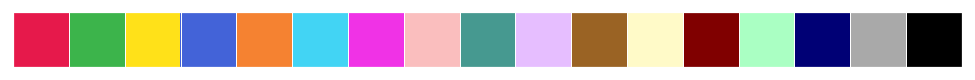

In [75]:
colors_17 = ["#e6194B",
"#3cb44b", 
"#ffe119", 
"#4363d8", 
"#f58231", 
"#42d4f4", 
"#f032e6", 
"#fabebe", 
"#469990", 
"#e6beff", 
"#9A6324", 
"#fffac8", 
"#800000", 
"#aaffc3", 
"#000075", 
"#a9a9a9", 
"#000000"]
col17 = sns.set_palette(colors_17)
sns.palplot(sns.color_palette())

In [88]:
sns.palplot()

TypeError: object of type 'LinearSegmentedColormap' has no len()

IndexError: list index out of range

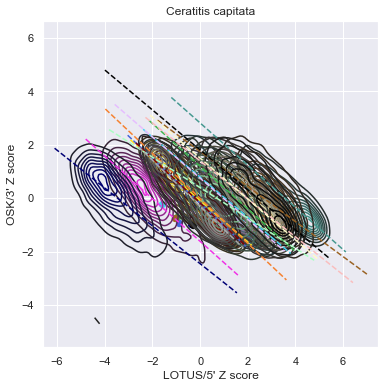

In [97]:
codon = 'GC3'
fig = plt.figure(figsize=(6,6))
i = 1
for orga in LOTUS:
#     fig.add_subplot(4,5,i)
    X = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    Y = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    
    x_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    y_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    
    a, b, r, p, std = stats.linregress(X, Y)

    x_min = min(X)
    y_min = a * x_min + b
    x_max = max(X)
    y_max = a * x_max + b

    sns.kdeplot(X, Y, cmap=sns.dark_palette(colors_17[i], as_cmap=True))
    plt.plot([x_min, x_max], [y_min, y_max], '--', color=sns.color_palette()[i])
#     plt.scatter(X, Y,  color='black', alpha=0.005)
    plt.scatter(x_osk, y_osk, s=40, color=sns.color_palette()[i])
    plt.title(orga)
    plt.xlabel("LOTUS/5' Z score")
    plt.ylabel("OSK/3' Z score")
    i += 1
#     if i == 2:
#         break
# fig.savefig('GC3_supinfo.png',dpi = 600)
# fig.savefig('GC3_supinfo.pdf')
# fig.savefig('GC3_supinfo.svg')

IndexError: list index out of range

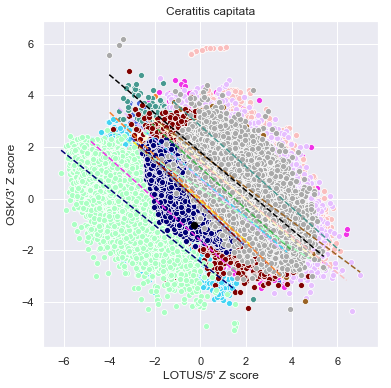

In [98]:
codon = 'GC3'
fig = plt.figure(figsize=(6,6))
i = 0
for orga in LOTUS:
#     fig.add_subplot(4,5,i)
    X = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    Y = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    
    x_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    y_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    
    a, b, r, p, std = stats.linregress(X, Y)

    x_min = min(X)
    y_min = a * x_min + b
    x_max = max(X)
    y_max = a * x_max + b

    sns.scatterplot(X, Y, cmap=sns.dark_palette(colors_17[i], as_cmap=True))
    plt.plot([x_min, x_max], [y_min, y_max], '--', color=sns.color_palette()[i])
#     plt.scatter(X, Y,  color='black', alpha=0.005)
    plt.scatter(x_osk, y_osk, s=40, color=sns.color_palette()[i])
    plt.title(orga)
    plt.xlabel("LOTUS/5' Z score")
    plt.ylabel("OSK/3' Z score")
    i += 1
#     if i == 2:
#         break
# fig.savefig('GC3_supinfo.png',dpi = 600)
# fig.savefig('GC3_supinfo.pdf')
# fig.savefig('GC3_supinfo.svg')

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
codons = ['AT3','GC3']
axes = [ax1, ax2]
for orga in LOTUS:
    for i in range(2):
        codon = codons[i]
        ax = axes[i]
        x_osk = signi_GC3_df[(signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
        y_osk = signi_GC3_df[(signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values

        x_null = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Metric'] == codon)]['Z_score'].values
        y_null = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Metric'] == codon)]['Z_score'].values

        a, b, r, p, std = stats.linregress(x_null, y_null)


        x_min = min(x_null)
        y_min = a * x_min + b
        x_max = max(x_null)
        y_max = a * x_max + b

        sns.scatterplot(x_null,y_null,ax=ax, color='Gray')
        ax.plot([x_min, x_max], [y_min, y_max], 'k--')

        sns.scatterplot(x_osk,y_osk,ax=ax, color='Red')
        ax.set_title(codon)
        if i in [1,0]:
            ax.set_xlabel('LOTUS/D0 Z score')
        if i in [0,2]:
            ax.set_ylabel('OSK/D1 Z score')
f.savefig('Oskar_AT3_GC3_Codon_Use.png',dpi=600)
f.savefig('Oskar_AT3_GC3_Codon_Use.pdf',dpi=600)
f.savefig('Oskar_AT3_GC3_Codon_Use.svg',dpi=600)

KeyboardInterrupt: 

Text(0.5, 1.0, 'test')

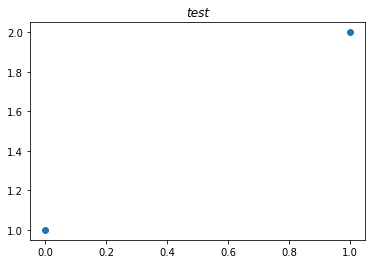

In [94]:
plt.plot([0,1], [1,2], 'o')
plt.title("test", style='italic')

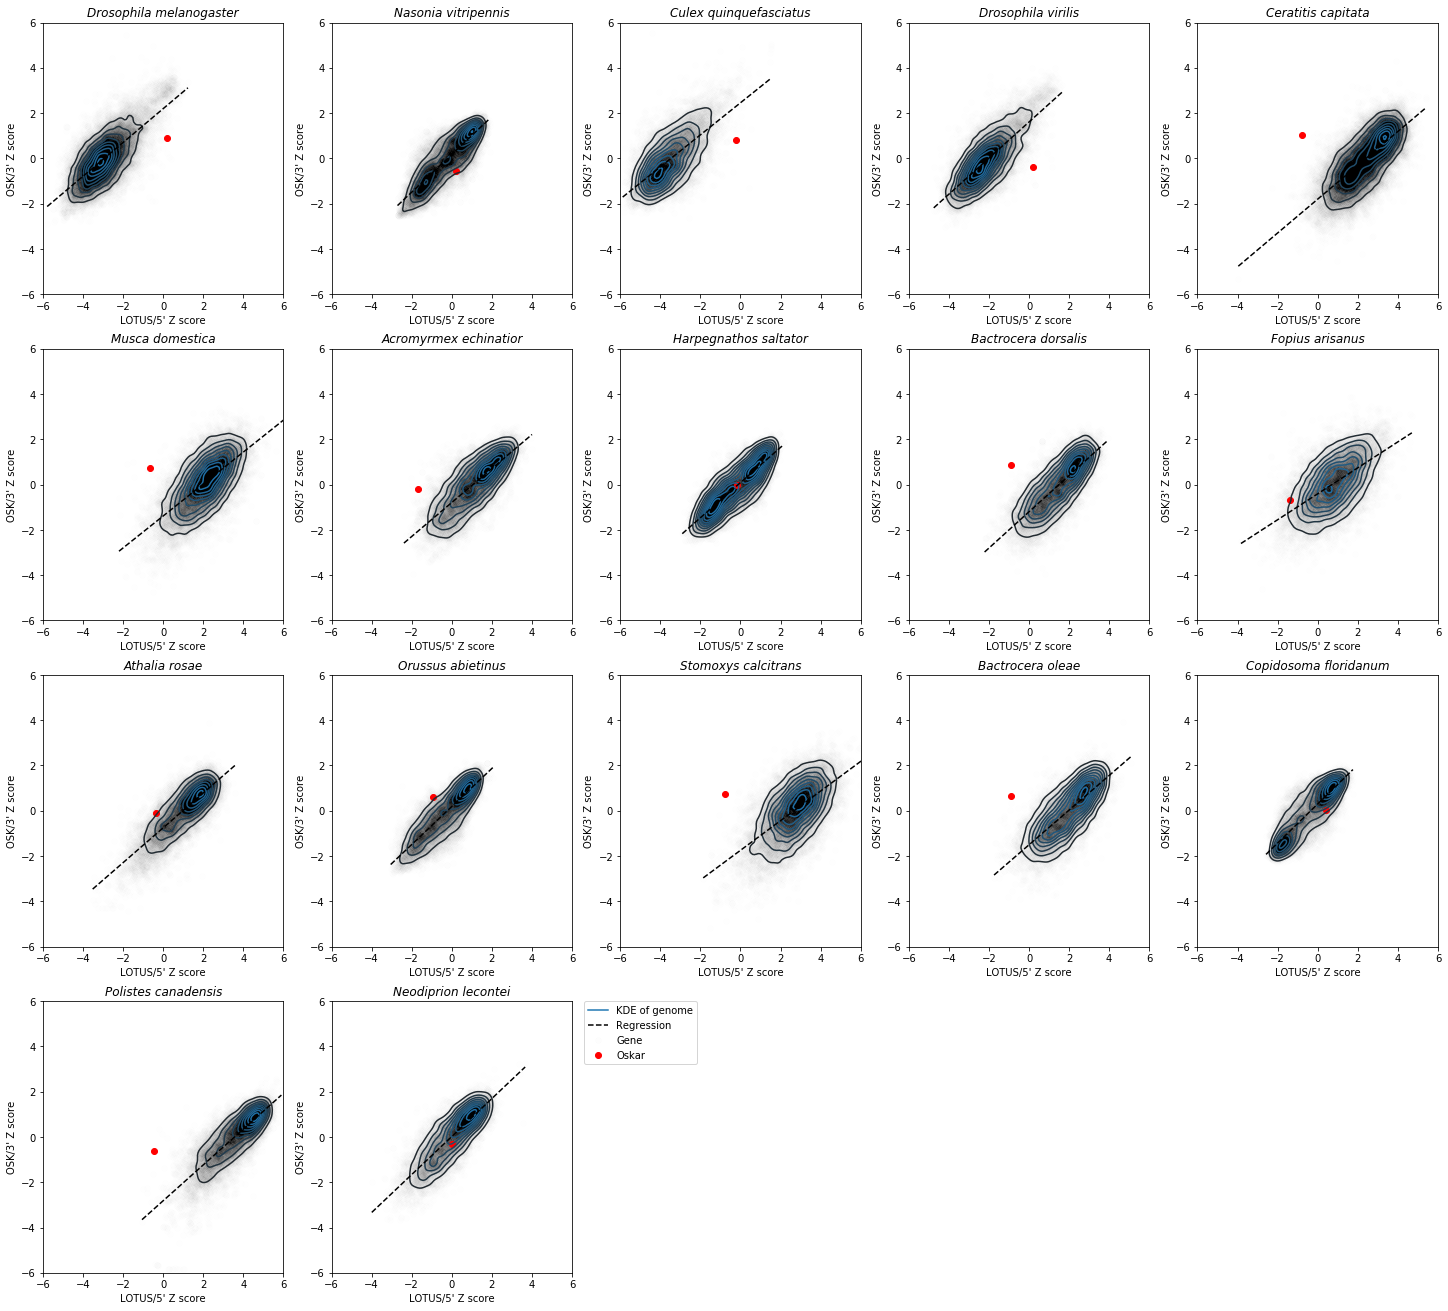

In [102]:
codon = 'GC3'
fig = plt.figure(figsize=(25,23))
i = 1
for orga in LOTUS:
    fig.add_subplot(4,5,i)
    X = null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    Y = null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    
    x_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    y_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    
    a, b, r, p, std = stats.linregress(X, Y)

    x_min = min(X)
    y_min = a * x_min + b
    x_max = max(X)
    y_max = a * x_max + b

    sns.kdeplot(X, -Y, label="KDE of genome")
    plt.plot([x_min, x_max], [-y_min, -y_max], 'k--', label="Regression")
    plt.scatter(X, -Y,  color='black', alpha=0.005, label="Gene")
    plt.scatter(x_osk, -y_osk,  color='red', label="Oskar")
    plt.title(orga, style='italic')
    plt.xlabel("LOTUS/5' Z score")
    plt.ylabel("OSK/3' Z score")
    plt.ylim(-6,6)
    plt.xlim(-6,6)
    i += 1
#     break
# fig.add_subplot(4,5,i)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('GC3_supinfo.png',dpi = 600)
fig.savefig('GC3_supinfo.pdf')
fig.savefig('GC3_supinfo.svg')

In [90]:
-X

array([ 0.3971877 ,  1.07889504,  1.06583095, ..., -0.56372414,
        0.25686204, -1.069639  ])

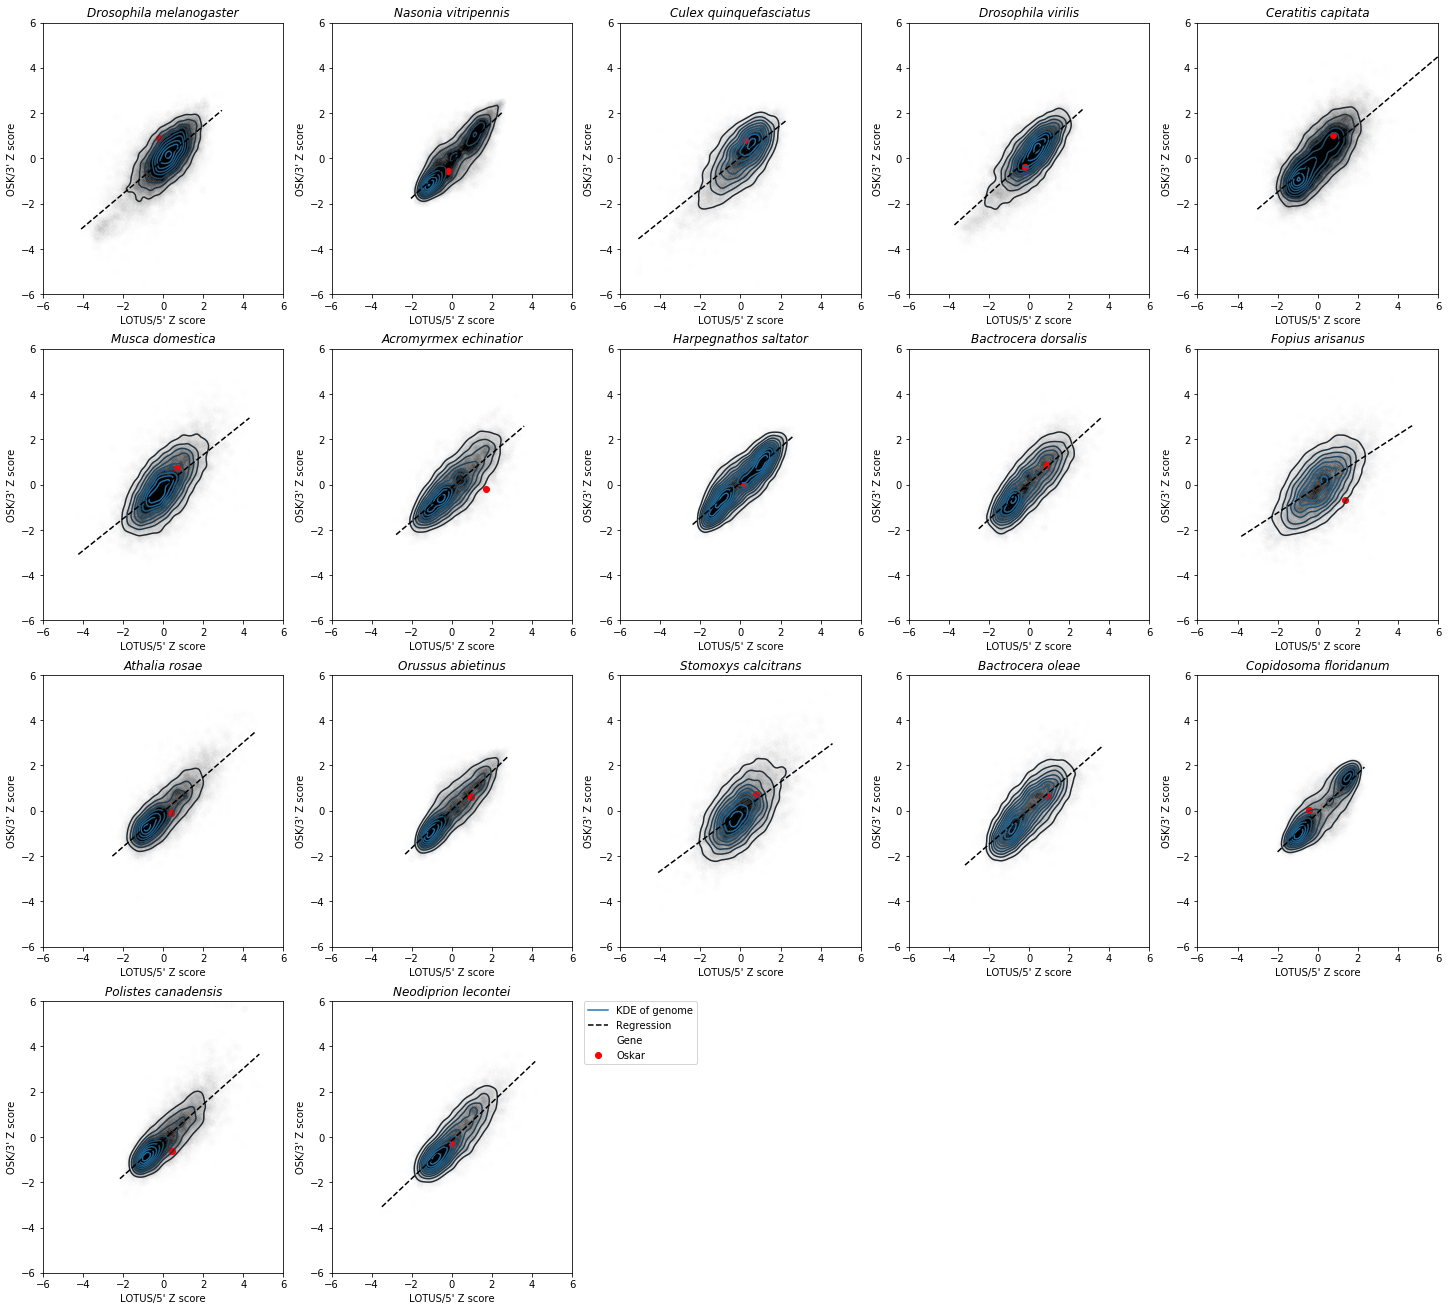

In [103]:
codon = 'AT3'
fig = plt.figure(figsize=(25,23))
i = 1
for orga in LOTUS:
    fig.add_subplot(4,5,i)
    X = -null_codon3[(null_codon3['Domain'] == 'D0') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    Y = -null_codon3[(null_codon3['Domain'] == 'D1') & (null_codon3['Organism'] == orga) & (null_codon3['Metric'] == codon)]['Z_score'].values
    
    x_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='LOTUS')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    y_osk = signi_GC3_df[(signi_GC3_df['Organism']==orga) & (signi_GC3_df['Domain']=='SGNH')  & (signi_GC3_df['Codon']==codon)]['Z_score'].values
    
    a, b, r, p, std = stats.linregress(X, Y)

    x_min = min(X)
    y_min = a * x_min + b
    x_max = max(X)
    y_max = a * x_max + b
    
    sns.kdeplot(X, Y, label="KDE of genome")
    plt.plot([x_min, x_max], [y_min, y_max], 'k--', label="Regression")
    plt.scatter(X, Y,  color='black', alpha=0.005, label="Gene")
    plt.scatter(x_osk, y_osk,  color='red', label="Oskar")
    plt.title(orga, style='italic')
    plt.xlabel("LOTUS/5' Z score")
    plt.ylabel("OSK/3' Z score")
    plt.ylim(-6,6)
    plt.xlim(-6,6)
    i += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('AT3_supinfo.png',dpi = 600)
fig.savefig('AT3_supinfo.pdf')
fig.savefig('AT3_supinfo.svg')

In [ ]:
f = plt.figure(figsize=(3,3))
sns.boxplot(data=residuals,x='Distribution',y='Residuals', order=['Oskar','Intra-Gene'])
plt.title('Residuals of GC3 content Z-score to genome GC3 distribution')
f.savefig('GC3_Residuals.png',dpi = 600)
f.savefig('GC3_Residuals.svg',dpi = 600)
f.savefig('GC3_Residuals.pdf')

In [315]:
x = residuals[(residuals['Distribution'] == 'Intra-Gene')]['Residuals'].values
y = residuals[(residuals['Distribution'] == 'Oskar')]['Residuals'].values
print(codon, stats.mannwhitneyu(x,y))

GC3 MannwhitneyuResult(statistic=221120.0, pvalue=1.9196019070324575e-07)


# 8) Analysis of the residuals of the linear regression of genome A3/T3/G3/C3 content

17215
Coefficients: 
 [[ 0.79547891]]
Residual sum of squares: 0.42
Residual sum of squares Osk: 0.37
Variance score: 0.60


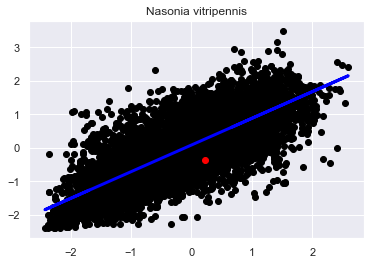

17215
Coefficients: 
 [[ 0.79480918]]
Residual sum of squares: 0.41
Residual sum of squares Osk: 0.05
Variance score: 0.61


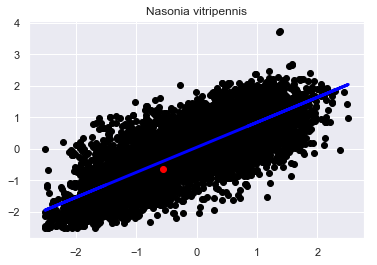

17215
Coefficients: 
 [[ 0.70026166]]
Residual sum of squares: 0.55
Residual sum of squares Osk: 0.58
Variance score: 0.47


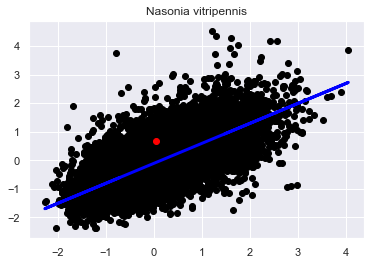

17215
Coefficients: 
 [[ 0.83565506]]
Residual sum of squares: 0.39
Residual sum of squares Osk: 0.03
Variance score: 0.63


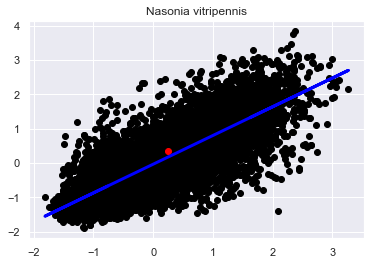

14195
Coefficients: 
 [[ 0.63639511]]
Residual sum of squares: 0.66
Residual sum of squares Osk: 5.76
Variance score: 0.45


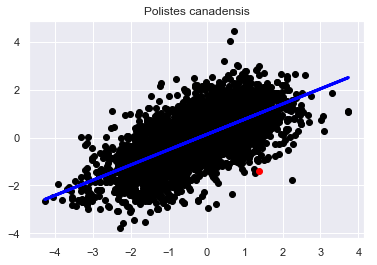

14195
Coefficients: 
 [[ 0.58339073]]
Residual sum of squares: 0.77
Residual sum of squares Osk: 0.23
Variance score: 0.35


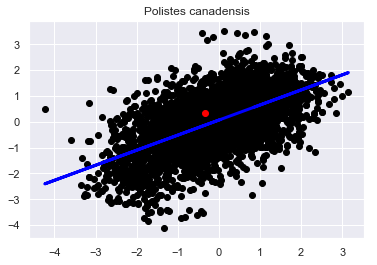

14195
Coefficients: 
 [[ 0.61845716]]
Residual sum of squares: 0.65
Residual sum of squares Osk: 1.76
Variance score: 0.43


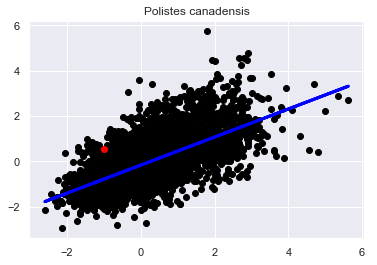

14195
Coefficients: 
 [[ 0.73318063]]
Residual sum of squares: 0.49
Residual sum of squares Osk: 0.98
Variance score: 0.59


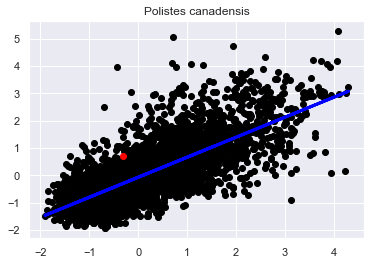

14133
Coefficients: 
 [[ 0.63772241]]
Residual sum of squares: 0.68
Residual sum of squares Osk: 0.28
Variance score: 0.43


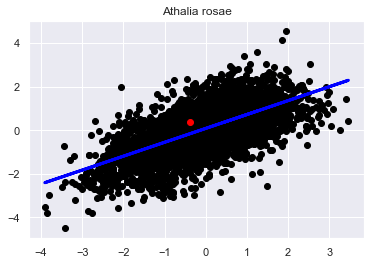

14133
Coefficients: 
 [[ 0.60407267]]
Residual sum of squares: 0.65
Residual sum of squares Osk: 0.05
Variance score: 0.46


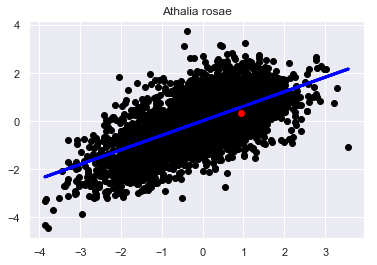

14133
Coefficients: 
 [[ 0.51245837]]
Residual sum of squares: 0.81
Residual sum of squares Osk: 0.04
Variance score: 0.35


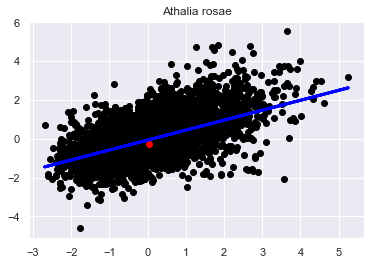

14133
Coefficients: 
 [[ 0.69774074]]
Residual sum of squares: 0.52
Residual sum of squares Osk: 0.01
Variance score: 0.54


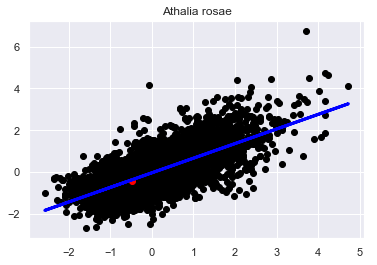

21487
Coefficients: 
 [[ 0.64946475]]
Residual sum of squares: 0.66
Residual sum of squares Osk: 1.38
Variance score: 0.41


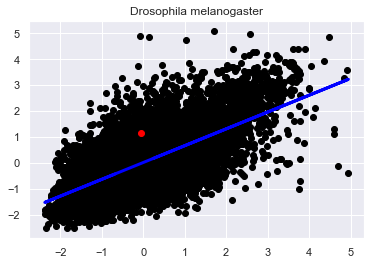

21487
Coefficients: 
 [[ 0.63243632]]
Residual sum of squares: 0.63
Residual sum of squares Osk: 0.41
Variance score: 0.41


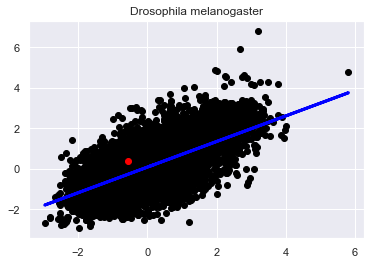

21487
Coefficients: 
 [[ 0.50079477]]
Residual sum of squares: 0.86
Residual sum of squares Osk: 1.34
Variance score: 0.27


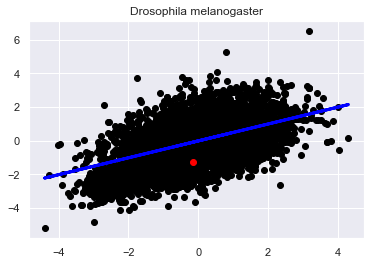

21487
Coefficients: 
 [[ 0.62779202]]
Residual sum of squares: 0.66
Residual sum of squares Osk: 0.33
Variance score: 0.38


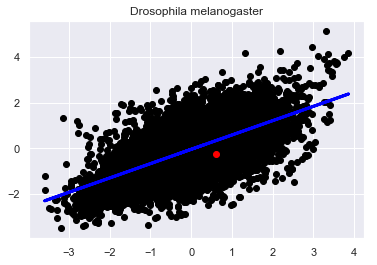

13656
Coefficients: 
 [[ 0.46387326]]
Residual sum of squares: 1.02
Residual sum of squares Osk: 0.67
Variance score: 0.13


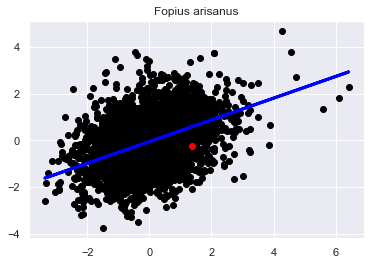

13656
Coefficients: 
 [[ 0.34370165]]
Residual sum of squares: 1.09
Residual sum of squares Osk: 0.28
Variance score: 0.08


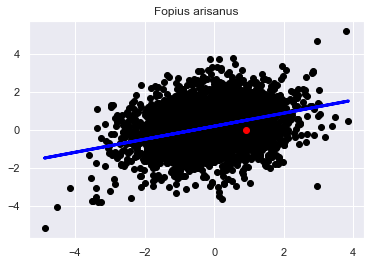

13656
Coefficients: 
 [[ 0.40608876]]
Residual sum of squares: 1.12
Residual sum of squares Osk: 0.30
Variance score: 0.12


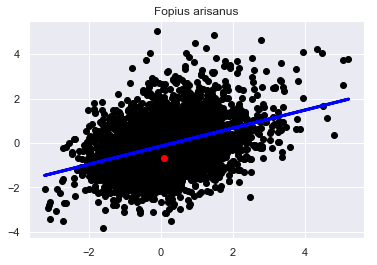

13656
Coefficients: 
 [[ 0.43408903]]
Residual sum of squares: 0.95
Residual sum of squares Osk: 3.21
Variance score: 0.15


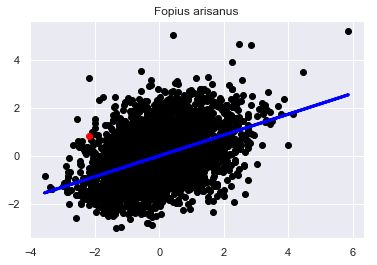

14874
Coefficients: 
 [[ 0.67097813]]
Residual sum of squares: 0.65
Residual sum of squares Osk: 4.99
Variance score: 0.44


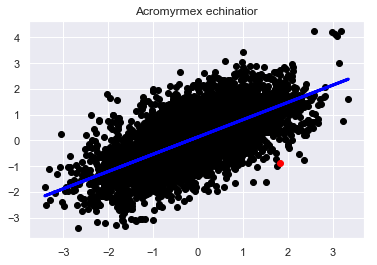

14874
Coefficients: 
 [[ 0.61450462]]
Residual sum of squares: 0.65
Residual sum of squares Osk: 0.58
Variance score: 0.41


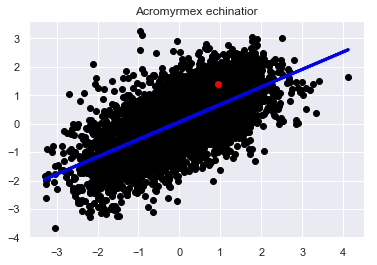

14874
Coefficients: 
 [[ 0.6166786]]
Residual sum of squares: 0.67
Residual sum of squares Osk: 0.16
Variance score: 0.39


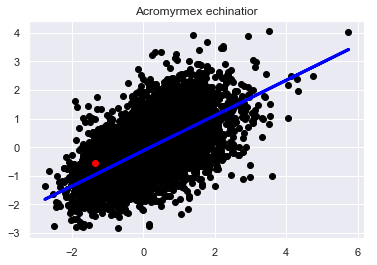

14874
Coefficients: 
 [[ 0.6919163]]
Residual sum of squares: 0.51
Residual sum of squares Osk: 1.53
Variance score: 0.53


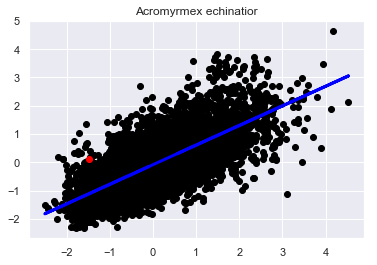

12270
Coefficients: 
 [[ 0.59815605]]
Residual sum of squares: 0.80
Residual sum of squares Osk: 1.15
Variance score: 0.29


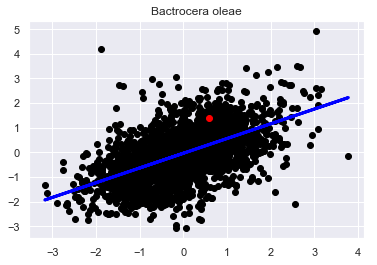

12270
Coefficients: 
 [[ 0.51331288]]
Residual sum of squares: 0.91
Residual sum of squares Osk: 0.36
Variance score: 0.27


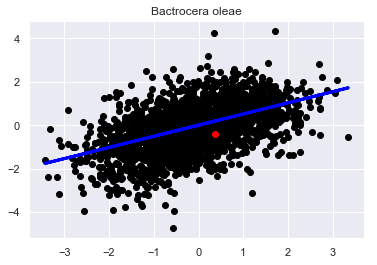

12270
Coefficients: 
 [[ 0.5572043]]
Residual sum of squares: 0.93
Residual sum of squares Osk: 0.00
Variance score: 0.26


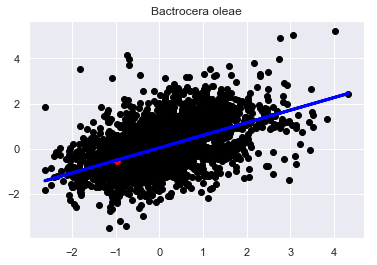

12270
Coefficients: 
 [[ 0.62023545]]
Residual sum of squares: 0.71
Residual sum of squares Osk: 0.31
Variance score: 0.33


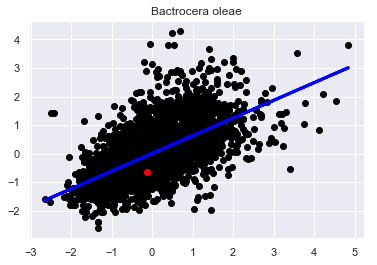

12333
Coefficients: 
 [[ 0.5798493]]
Residual sum of squares: 0.62
Residual sum of squares Osk: 0.73
Variance score: 0.33


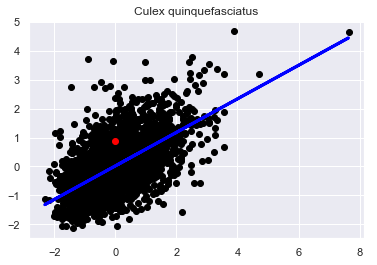

12333
Coefficients: 
 [[ 0.63454077]]
Residual sum of squares: 0.69
Residual sum of squares Osk: 0.32
Variance score: 0.32


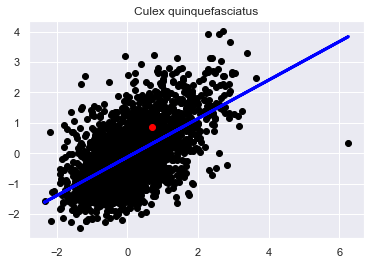

12333
Coefficients: 
 [[ 0.38848476]]
Residual sum of squares: 0.90
Residual sum of squares Osk: 2.08
Variance score: 0.19


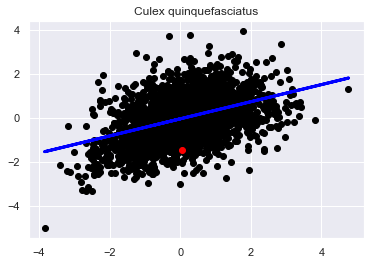

12333
Coefficients: 
 [[ 0.41515577]]
Residual sum of squares: 1.06
Residual sum of squares Osk: 0.01
Variance score: 0.14


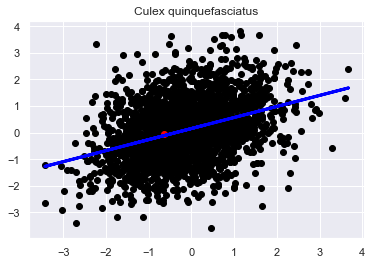

11007
Coefficients: 
 [[ 0.74883854]]
Residual sum of squares: 0.64
Residual sum of squares Osk: 0.29
Variance score: 0.47


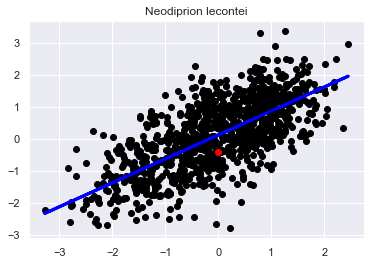

11007
Coefficients: 
 [[ 0.6918737]]
Residual sum of squares: 0.60
Residual sum of squares Osk: 0.25
Variance score: 0.50


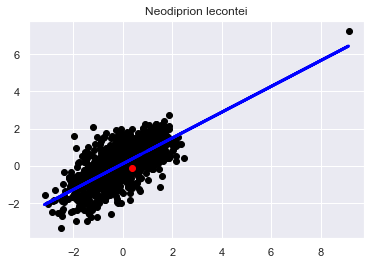

11007
Coefficients: 
 [[ 0.58726574]]
Residual sum of squares: 0.76
Residual sum of squares Osk: 0.00
Variance score: 0.37


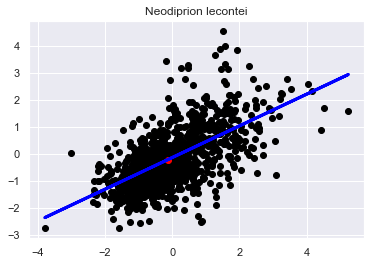

11007
Coefficients: 
 [[ 0.76318019]]
Residual sum of squares: 0.53
Residual sum of squares Osk: 0.75
Variance score: 0.55


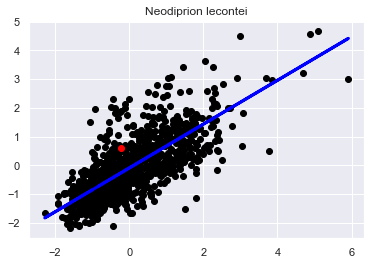

17904
Coefficients: 
 [[ 0.58929429]]
Residual sum of squares: 0.78
Residual sum of squares Osk: 0.30
Variance score: 0.34


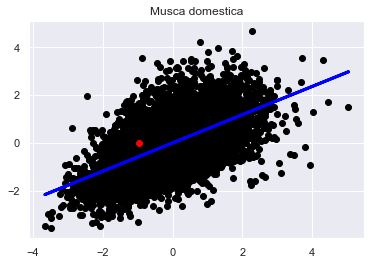

17904
Coefficients: 
 [[ 0.45035241]]
Residual sum of squares: 0.95
Residual sum of squares Osk: 0.33
Variance score: 0.20


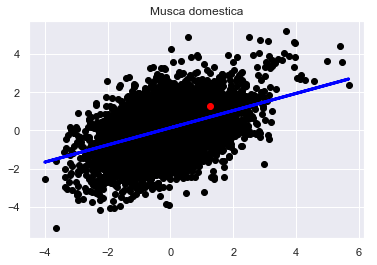

17904
Coefficients: 
 [[ 0.43045783]]
Residual sum of squares: 1.02
Residual sum of squares Osk: 1.07
Variance score: 0.20


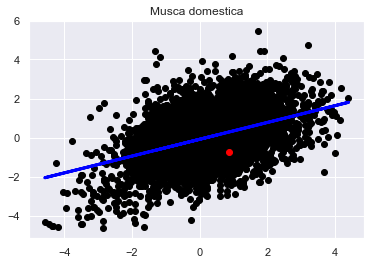

17904
Coefficients: 
 [[ 0.6409886]]
Residual sum of squares: 0.70
Residual sum of squares Osk: 0.00
Variance score: 0.36


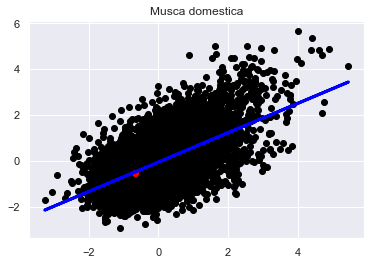

27146
Coefficients: 
 [[ 0.55142862]]
Residual sum of squares: 0.87
Residual sum of squares Osk: 0.57
Variance score: 0.31


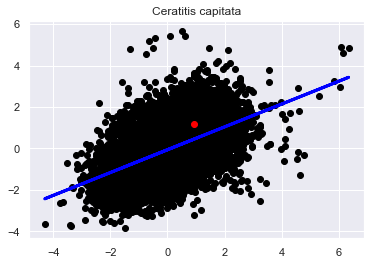

27146
Coefficients: 
 [[ 0.42948408]]
Residual sum of squares: 1.03
Residual sum of squares Osk: 0.19
Variance score: 0.19


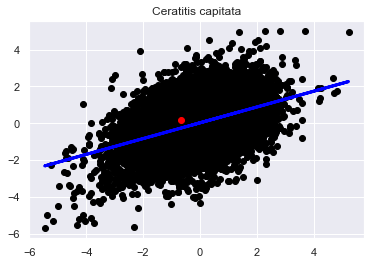

27146
Coefficients: 
 [[ 0.49955379]]
Residual sum of squares: 1.04
Residual sum of squares Osk: 0.63
Variance score: 0.24


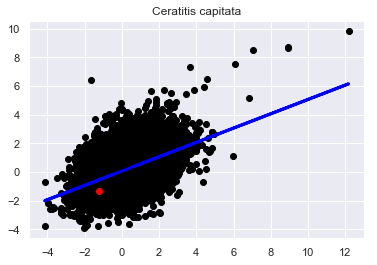

27146
Coefficients: 
 [[ 0.55650213]]
Residual sum of squares: 0.76
Residual sum of squares Osk: 0.47
Variance score: 0.30


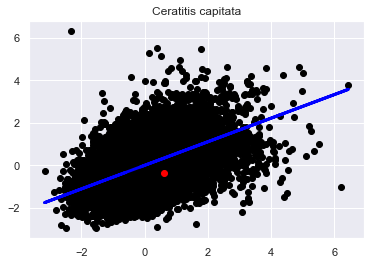

13015
Coefficients: 
 [[ 0.64487883]]
Residual sum of squares: 0.74
Residual sum of squares Osk: 0.60
Variance score: 0.36


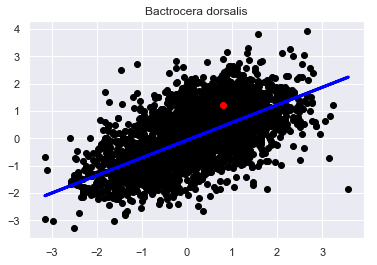

13015
Coefficients: 
 [[ 0.5719842]]
Residual sum of squares: 0.90
Residual sum of squares Osk: 0.31
Variance score: 0.33


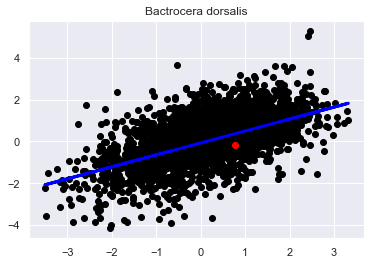

13015
Coefficients: 
 [[ 0.58518714]]
Residual sum of squares: 0.85
Residual sum of squares Osk: 0.01
Variance score: 0.35


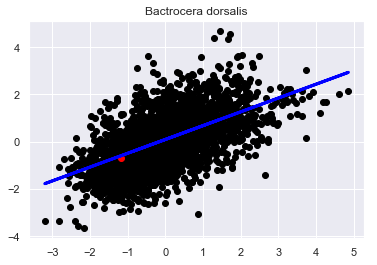

13015
Coefficients: 
 [[ 0.65962832]]
Residual sum of squares: 0.57
Residual sum of squares Osk: 0.05
Variance score: 0.44


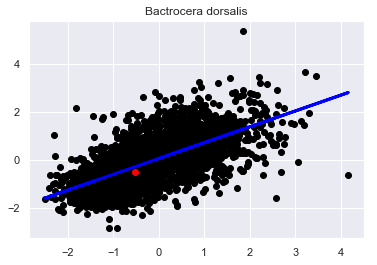

12193
Coefficients: 
 [[ 0.82073644]]
Residual sum of squares: 0.49
Residual sum of squares Osk: 0.04
Variance score: 0.59


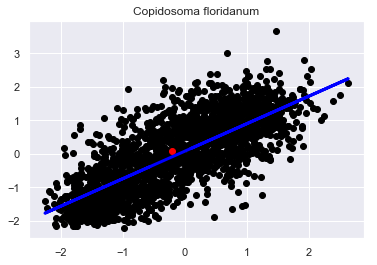

12193
Coefficients: 
 [[ 0.78122422]]
Residual sum of squares: 0.36
Residual sum of squares Osk: 0.47
Variance score: 0.67


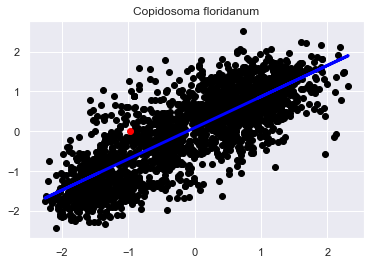

12193
Coefficients: 
 [[ 0.75598119]]
Residual sum of squares: 0.54
Residual sum of squares Osk: 0.00
Variance score: 0.55


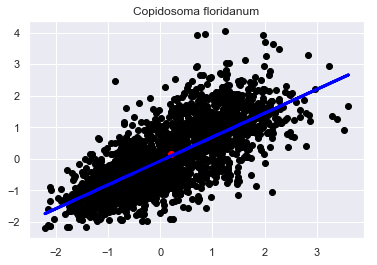

12193
Coefficients: 
 [[ 0.79695238]]
Residual sum of squares: 0.42
Residual sum of squares Osk: 0.64
Variance score: 0.62


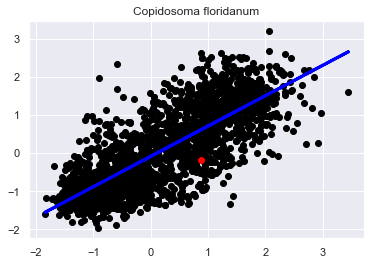

13058
Coefficients: 
 [[ 0.80945783]]
Residual sum of squares: 0.44
Residual sum of squares Osk: 0.02
Variance score: 0.60


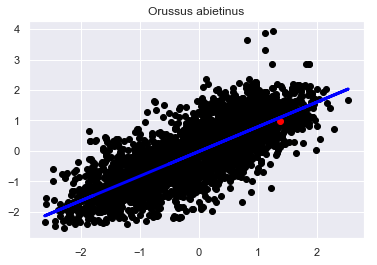

13058
Coefficients: 
 [[ 0.74392758]]
Residual sum of squares: 0.43
Residual sum of squares Osk: 0.41
Variance score: 0.58


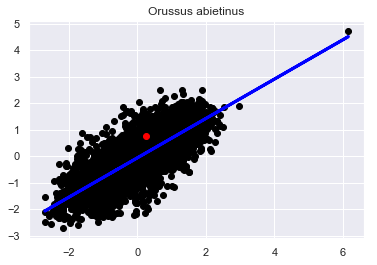

13058
Coefficients: 
 [[ 0.71346755]]
Residual sum of squares: 0.50
Residual sum of squares Osk: 0.50
Variance score: 0.52


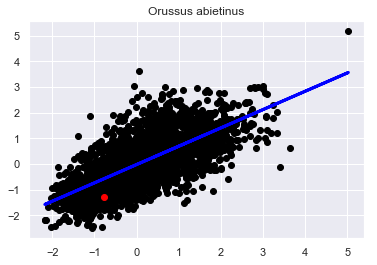

13058
Coefficients: 
 [[ 0.79461801]]
Residual sum of squares: 0.43
Residual sum of squares Osk: 0.00
Variance score: 0.60


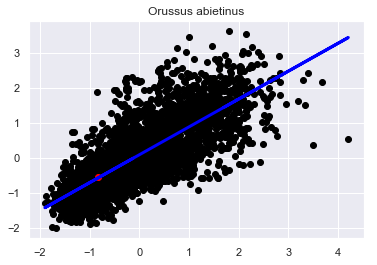

15692
Coefficients: 
 [[ 0.54898641]]
Residual sum of squares: 0.86
Residual sum of squares Osk: 0.12
Variance score: 0.25


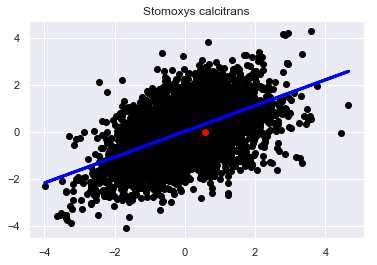

15692
Coefficients: 
 [[ 0.43105494]]
Residual sum of squares: 1.06
Residual sum of squares Osk: 0.49
Variance score: 0.14


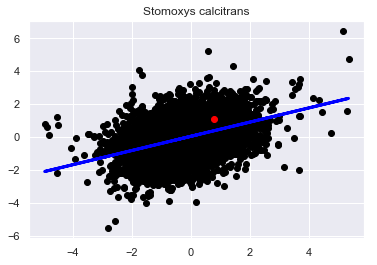

15692
Coefficients: 
 [[ 0.39569377]]
Residual sum of squares: 1.10
Residual sum of squares Osk: 0.64
Variance score: 0.12


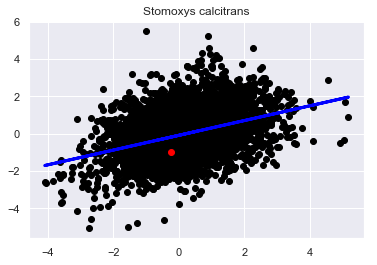

15692
Coefficients: 
 [[ 0.60385531]]
Residual sum of squares: 0.84
Residual sum of squares Osk: 0.21
Variance score: 0.28


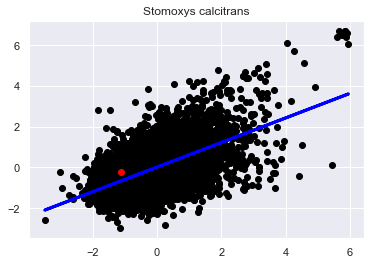

14829
Coefficients: 
 [[ 0.61205015]]
Residual sum of squares: 0.66
Residual sum of squares Osk: 0.11
Variance score: 0.50


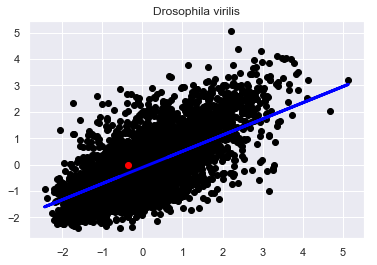

14829
Coefficients: 
 [[ 0.61165325]]
Residual sum of squares: 0.78
Residual sum of squares Osk: 0.03
Variance score: 0.44


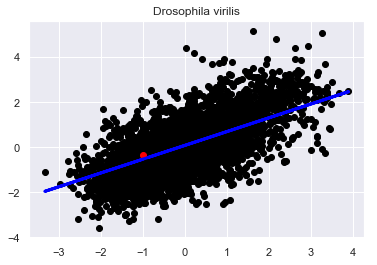

14829
Coefficients: 
 [[ 0.53544552]]
Residual sum of squares: 0.84
Residual sum of squares Osk: 0.59
Variance score: 0.38


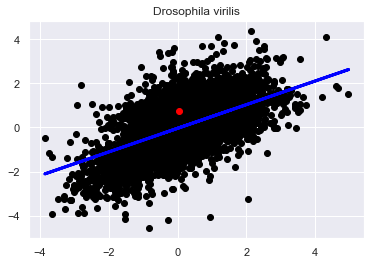

14829
Coefficients: 
 [[ 0.58488498]]
Residual sum of squares: 0.93
Residual sum of squares Osk: 1.34
Variance score: 0.37


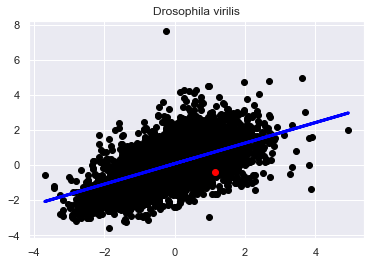

14995
Coefficients: 
 [[ 0.72929117]]
Residual sum of squares: 0.40
Residual sum of squares Osk: 0.76
Variance score: 0.61


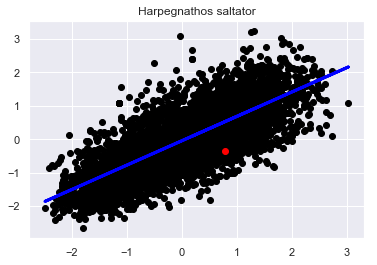

14995
Coefficients: 
 [[ 0.6926455]]
Residual sum of squares: 0.42
Residual sum of squares Osk: 0.34
Variance score: 0.60


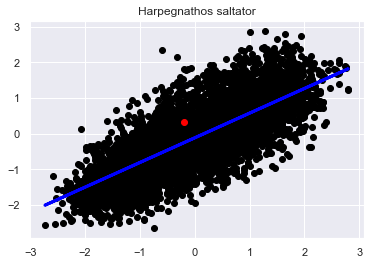

14995
Coefficients: 
 [[ 0.66777058]]
Residual sum of squares: 0.52
Residual sum of squares Osk: 0.99
Variance score: 0.52


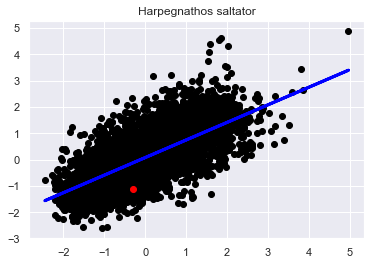

14995
Coefficients: 
 [[ 0.72352787]]
Residual sum of squares: 0.40
Residual sum of squares Osk: 1.23
Variance score: 0.63


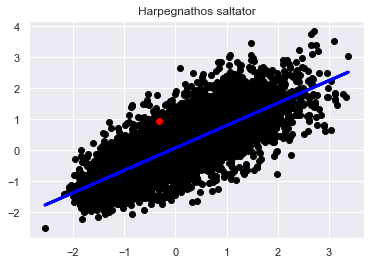

In [316]:
residuals_atgc3 = []
for orga in LOTUS:
    for codon in ['A3','T3','C3','G3']:
        # Split the data into training/testing sets
        X = null_at3gc3[(null_at3gc3['Domain'] == 'D0') & (null_at3gc3['Organism'] == orga) & (null_at3gc3['Metric'] == codon)]['Z_score'].values
        print(len(X))
        X_train = np.array([X[:10000]]).T
        X_test = np.array([X[10000:]]).T
        X_osk = np.array([signi_3_df[(signi_3_df['Domain']=='LOTUS') & (signi_3_df['Organism']== orga) & (signi_3_df['Codon']==codon)]['Z_score'].values]).T
        # Split the targets into training/testing sets
        Y = null_at3gc3[(null_at3gc3['Domain'] == 'D1') & (null_at3gc3['Organism'] == orga) & (null_at3gc3['Metric'] == codon)]['Z_score'].values
        y_train = np.array([Y[:10000]]).T
        y_test = np.array([Y[10000:]]).T
        y_osk = np.array([signi_3_df[(signi_3_df['Domain']=='SGNH') & (signi_3_df['Organism']== orga) & (signi_3_df['Codon']==codon)]['Z_score'].values]).T

        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(X_train, y_train)

        # The coefficients
        print('Coefficients: \n', regr.coef_)
        # The mean square error
        print("Residual sum of squares: %.2f"
              % np.mean((regr.predict(X_test) - y_test) ** 2))
        for i in ((regr.predict(X_test) - y_test) ** 2):
            residuals_atgc3.append(['Intra-Gene', codon, i[0]])
        print("Residual sum of squares Osk: %.2f"
              % np.mean((regr.predict(X_osk) - y_osk) ** 2))
        residuals_atgc3.append(['Oskar', codon, np.mean((regr.predict(X_osk) - y_osk) ** 2)])
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(X_test, y_test))

        # Plot outputs
        plt.scatter(X_test, y_test,  color='black')
        plt.plot(X_test, regr.predict(X_test), color='blue',
                 linewidth=3)
        plt.scatter(X_osk, y_osk,  color='red')
        plt.title(orga)
        plt.show()
residuals_atgc3 = pd.DataFrame(residuals_atgc3, columns=['Distribution', 'Codon', 'Residuals'])

/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/lblondel/anaconda3/envs/datascience/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

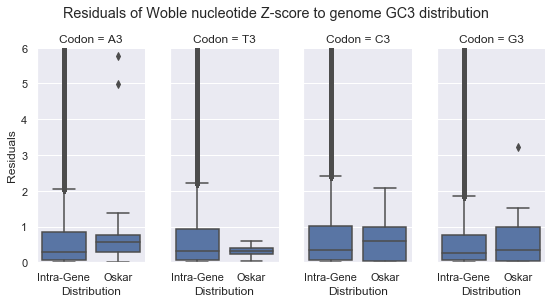

In [317]:
f = plt.figure()
g = sns.FacetGrid(residuals_atgc3, col="Codon", size=4, aspect=.5)
g = g.map(sns.boxplot, "Distribution", "Residuals")
plt.suptitle('Residuals of Woble nucleotide Z-score to genome GC3 distribution',y=1.05)
plt.ylim(0,6)
g.savefig('wobble_Residuals.png',dpi = 600)

In [318]:
for codon in ['A3','T3','C3','G3']:
    x = residuals_atgc3[(residuals_atgc3['Distribution'] == 'Intra-Gene') & (residuals_atgc3['Codon'] == codon)]['Residuals'].values
    y = residuals_atgc3[(residuals_atgc3['Distribution'] == 'Oskar') & (residuals_atgc3['Codon'] == codon)]['Residuals'].values
    print(codon, stats.mannwhitneyu(x,y))

A3 MannwhitneyuResult(statistic=616588.0, pvalue=0.08295890842741388)
T3 MannwhitneyuResult(statistic=716068.0, pvalue=0.32387569395161148)
C3 MannwhitneyuResult(statistic=756558.0, pvalue=0.46853534361781551)
G3 MannwhitneyuResult(statistic=750674.0, pvalue=0.44675120300448073)
